In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_1 = pd.read_csv("Sparkling.csv",parse_dates=['YearMonth'],squeeze=True,index_col=0)

In [3]:
df_1.head(7)

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
1980-06-01    1377
1980-07-01    1966
Name: Sparkling, dtype: int64

In [193]:
df_1.tail()

YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64

In [4]:
df_1.shape

(187,)

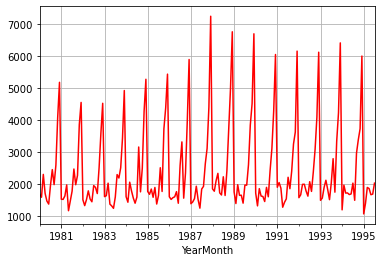

In [5]:
df_1.plot(color='r');
plt.grid()

In [6]:
df_2=pd.read_csv("Sparkling.csv")

In [7]:
df_2.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [8]:
df_2.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

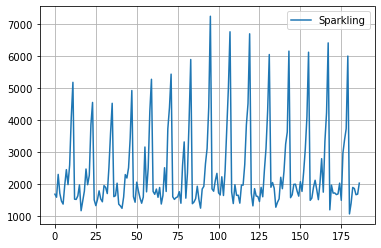

In [9]:
df_2.plot();
plt.grid()

In [10]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [11]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [12]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_2.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

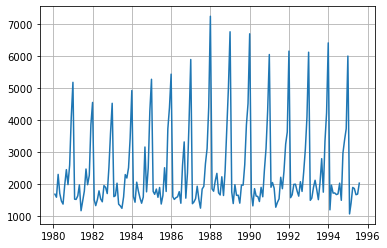

In [13]:
plt.plot(df_2['Time_Stamp'],df_2['Sparkling']);
plt.grid()

In [14]:
df_1.mean()

2402.4171122994653

In [15]:
df_1.median()

1874.0

In [16]:
df_1.describe()

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

In [17]:
df_1['1980']

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
1980-06-01    1377
1980-07-01    1966
1980-08-01    2453
1980-09-01    1984
1980-10-01    2596
1980-11-01    4087
1980-12-01    5179
Name: Sparkling, dtype: int64

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


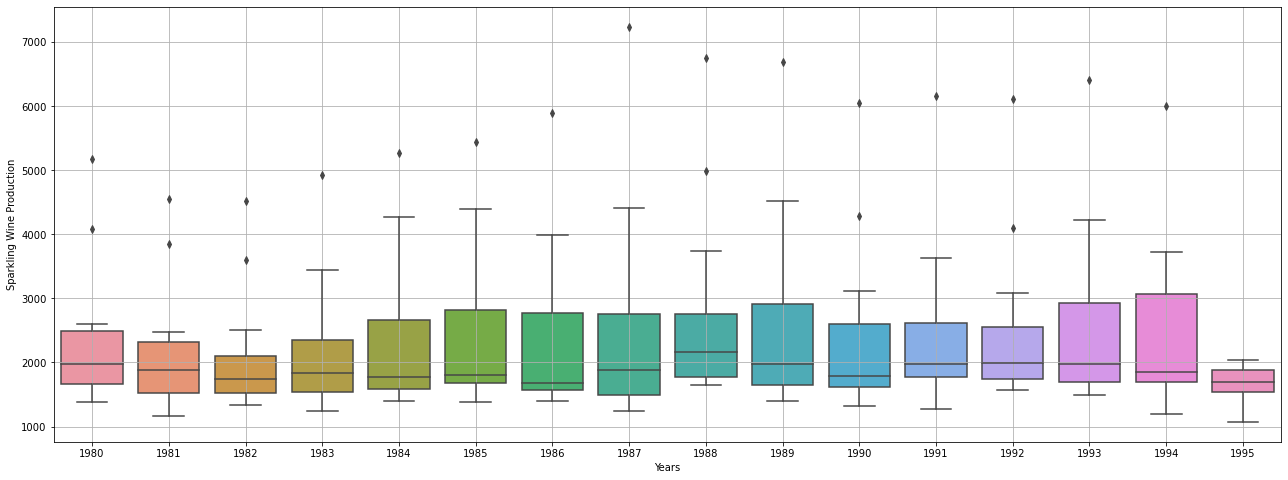

In [18]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Sparkling Wine Production');

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


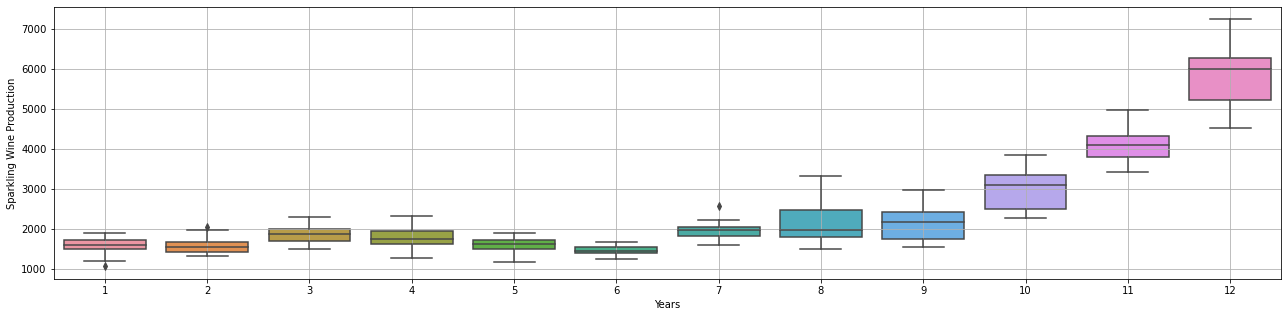

In [19]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Sparkling Wine Production');

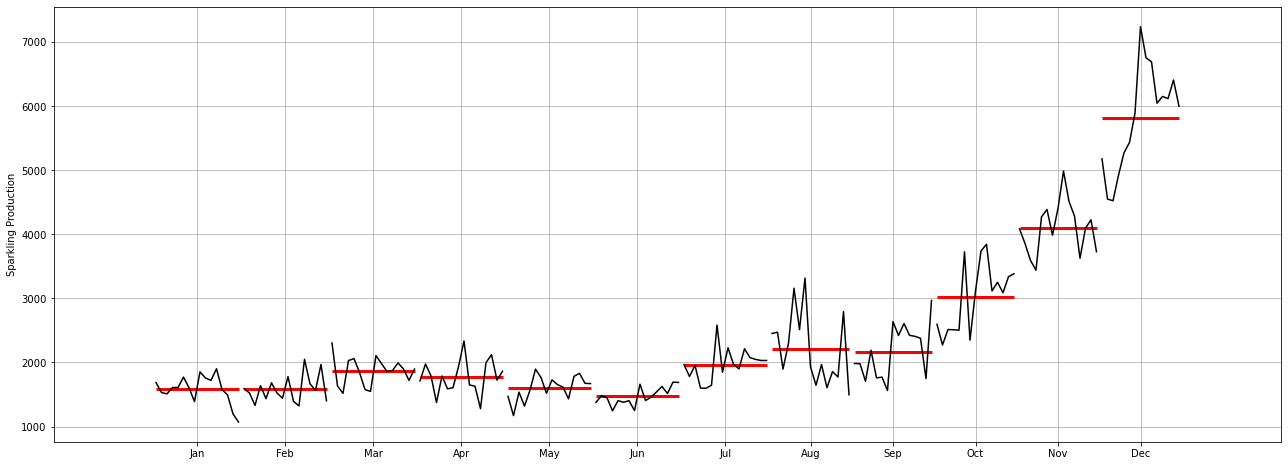

In [20]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Sparkling Production',ax=ax)
plt.grid();

In [21]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [22]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [23]:
df_2['Sparkling']

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
              ... 
1995-03-31    1897
1995-04-30    1862
1995-05-31    1670
1995-06-30    1688
1995-07-31    2031
Name: Sparkling, Length: 187, dtype: int64

In [24]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Sparkling', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

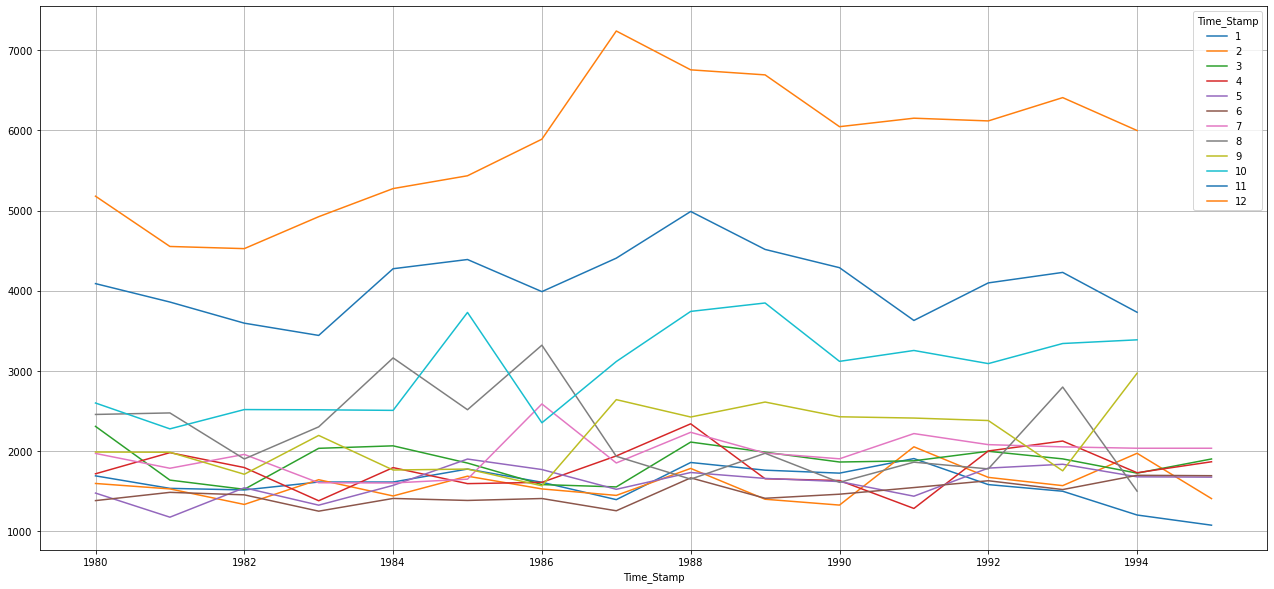

In [25]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [26]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    28406
1981-12-31    26227
1982-12-31    25321
1983-12-31    26180
1984-12-31    28431
Freq: A-DEC, Name: Sparkling, dtype: int64

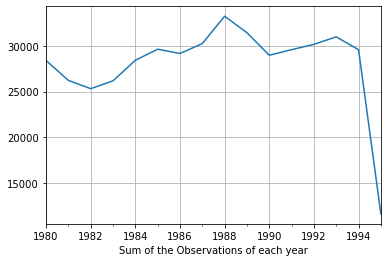

In [27]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [28]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    2367.166667
1981-12-31    2185.583333
1982-12-31    2110.083333
1983-12-31    2181.666667
1984-12-31    2369.250000
Freq: A-DEC, Name: Sparkling, dtype: float64

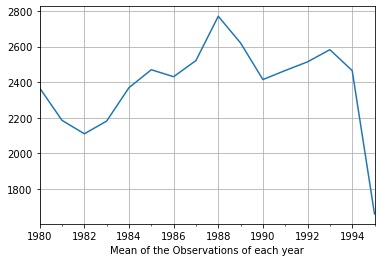

In [29]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

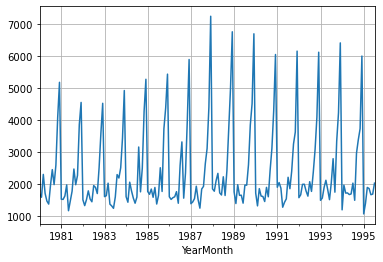

In [30]:
df_1.plot()
plt.grid();

In [31]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31     5581
1980-06-30     4560
1980-09-30     6403
1980-12-31    11862
1981-03-31     4686
Freq: Q-DEC, Name: Sparkling, dtype: int64

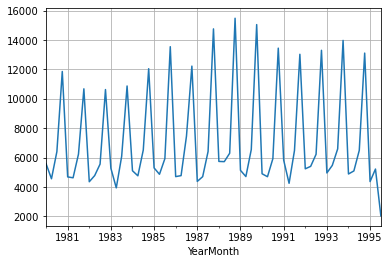

In [32]:
df_quarterly_sum.plot();
plt.grid()

In [33]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    1860.333333
1980-06-30    1520.000000
1980-09-30    2134.333333
1980-12-31    3954.000000
1981-03-31    1562.000000
Freq: Q-DEC, Name: Sparkling, dtype: float64

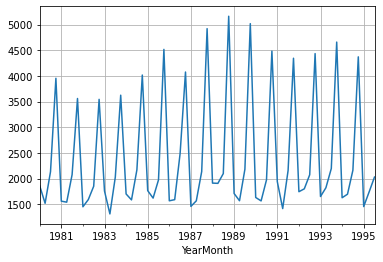

In [34]:
df_quarterly_mean.plot();
plt.grid()

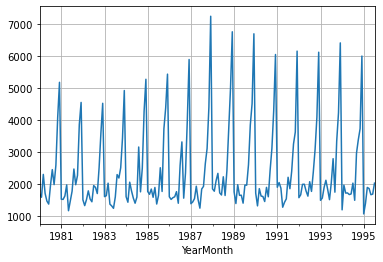

In [35]:
df_1.plot()
plt.grid();

In [36]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01    1686
1980-01-02       0
1980-01-03       0
1980-01-04       0
1980-01-05       0
              ... 
1995-06-27       0
1995-06-28       0
1995-06-29       0
1995-06-30       0
1995-07-01    2031
Freq: D, Name: Sparkling, Length: 5661, dtype: int64

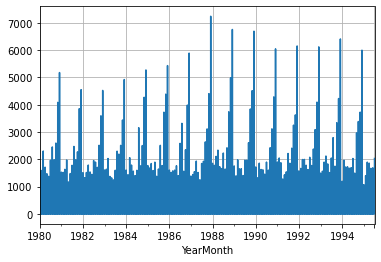

In [37]:
df_daily_sum.plot()
plt.grid();

In [38]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     28406
1990-12-31    288893
2000-12-31    131953
Freq: 10A-DEC, Name: Sparkling, dtype: int64

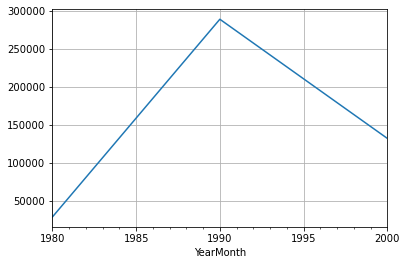

In [39]:
df_decade_sum.plot();
plt.grid()

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Missing Value Handling

In [41]:
df_1.isna().sum()

0

In [42]:
df_2.isna().sum()

Sparkling    0
dtype: int64

In [43]:
df_1.isna().sum()

0

In [44]:
df_2.isna().sum()

Sparkling    0
dtype: int64

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

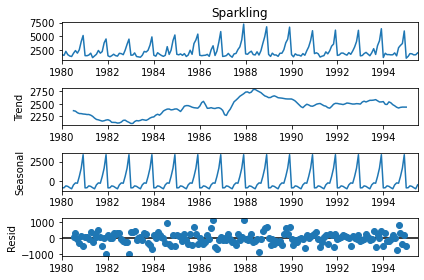

In [46]:
decomposition_additive = seasonal_decompose(df_1,model='additive')
decomposition_additive.plot();

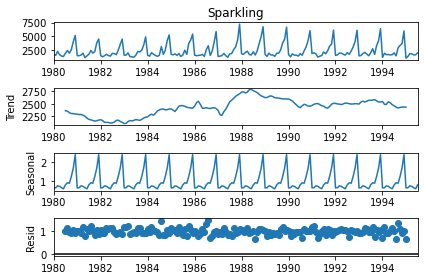

In [47]:
decomposition_multiplicative = seasonal_decompose(df_1,model='multiplicative')
decomposition_multiplicative.plot();

In [48]:
new_df_add = pd.concat([decomposition_additive.seasonal, decomposition_additive.trend, decomposition_additive.resid, decomposition_additive.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(10)

seasoanilty        trend    residual  actual_values
YearMonth                                                      
1980-01-01  -854.260599          NaN         NaN         1686.0
1980-02-01  -830.350678          NaN         NaN         1591.0
1980-03-01  -592.356630          NaN         NaN         2304.0
1980-04-01  -658.490559          NaN         NaN         1712.0
1980-05-01  -824.416154          NaN         NaN         1471.0
1980-06-01  -967.434011          NaN         NaN         1377.0
1980-07-01  -465.502265  2360.666667   70.835599         1966.0
1980-08-01  -214.332821  2351.333333  315.999487         2453.0
1980-09-01  -254.677265  2320.541667  -81.864401         1984.0
1980-10-01   599.769957  2303.583333 -307.353290         2596.0

In [49]:
new_df_mult = pd.concat([decomposition_multiplicative.seasonal,decomposition_multiplicative.trend, decomposition_multiplicative.resid, decomposition_multiplicative.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(10)

seasoanilty        trend  residual  actual_values
YearMonth                                                    
1980-01-01     0.649843          NaN       NaN         1686.0
1980-02-01     0.659214          NaN       NaN         1591.0
1980-03-01     0.757440          NaN       NaN         2304.0
1980-04-01     0.730351          NaN       NaN         1712.0
1980-05-01     0.660609          NaN       NaN         1471.0
1980-06-01     0.603468          NaN       NaN         1377.0
1980-07-01     0.809164  2360.666667  1.029230         1966.0
1980-08-01     0.918822  2351.333333  1.135407         2453.0
1980-09-01     0.894367  2320.541667  0.955954         1984.0
1980-10-01     1.241789  2303.583333  0.907513         2596.0

In [50]:
train    =   df_2[0:int(len(df_1)*0.71)] 
test     =   df_2[int(len(df_1)*0.71):]

In [51]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [52]:
test.head()

Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [53]:
train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

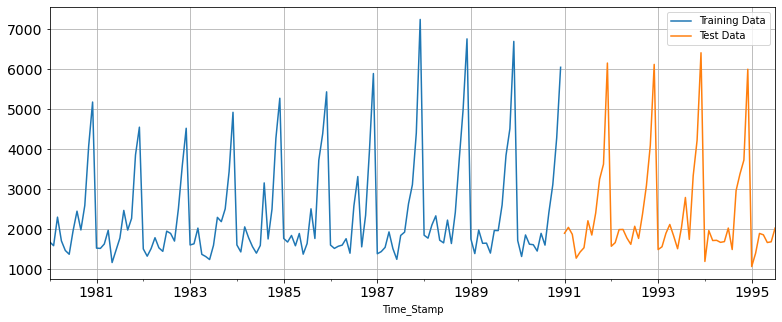

In [54]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics.

# Model 1: Linear Regression


In [55]:
range(len(train))

range(0, 132)

In [56]:
df_2.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [57]:
train_time = []
for i in range(len(train)):
    train_time.append(i + 1)

In [58]:
print(train_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


In [59]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [60]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [61]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



# Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

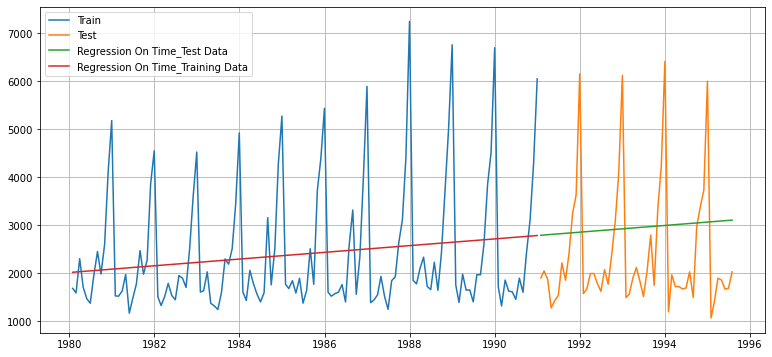

In [65]:
LinearRegression_train['RegOnTime']  = lr.predict(LinearRegression_train[['time']])

LinearRegression_test['RegOnTime']   = lr.predict(LinearRegression_test[['time']])


plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [66]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    return mape

In [67]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime'],squared=False)
mape_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime'])
print("For RegressionOnTime forecast on the Training Data, RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data, RMSE is 1279.322 MAPE is 40.05


In [68]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime'],squared=False)
mape_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 50.15


In [69]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

# Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [70]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [71]:
NaiveModel_train['Sparkling'][len(NaiveModel_train) - 1]

6047

In [72]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [73]:
np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]

6047

In [74]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

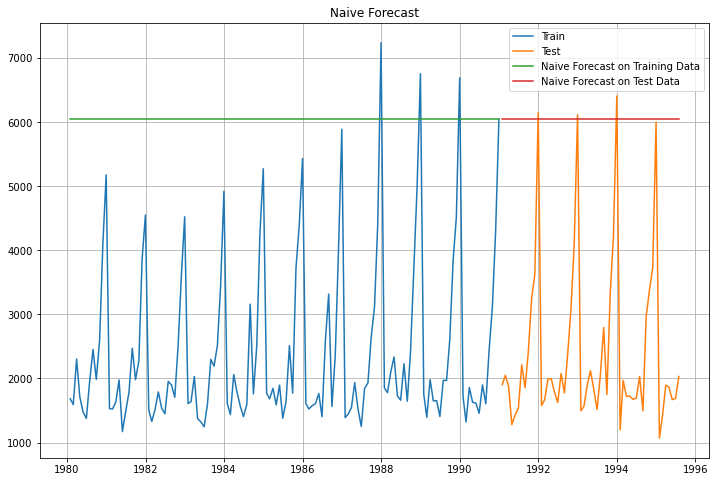

In [75]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [76]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [77]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [78]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

## Method 3: Simple Average


#### For this particular simple average method, we will forecast by using the average of the training values.

In [79]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [80]:
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
Time_Stamp                          
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303

In [81]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

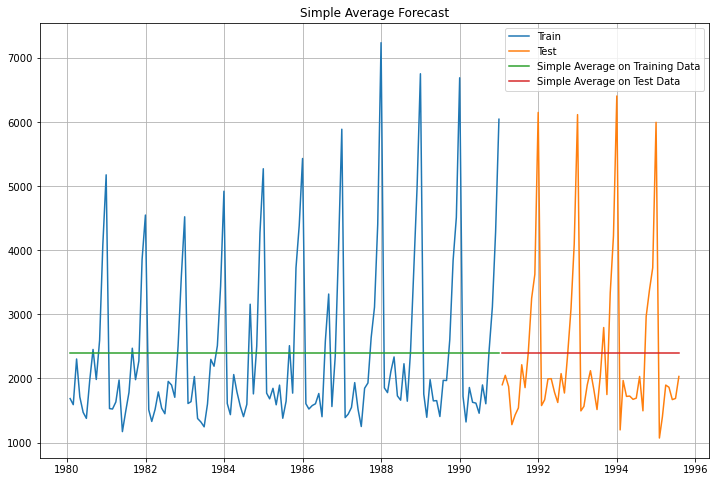

In [82]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [83]:
rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [84]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [85]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [86]:
MovingAverage = df_2.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [87]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

In [88]:
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()

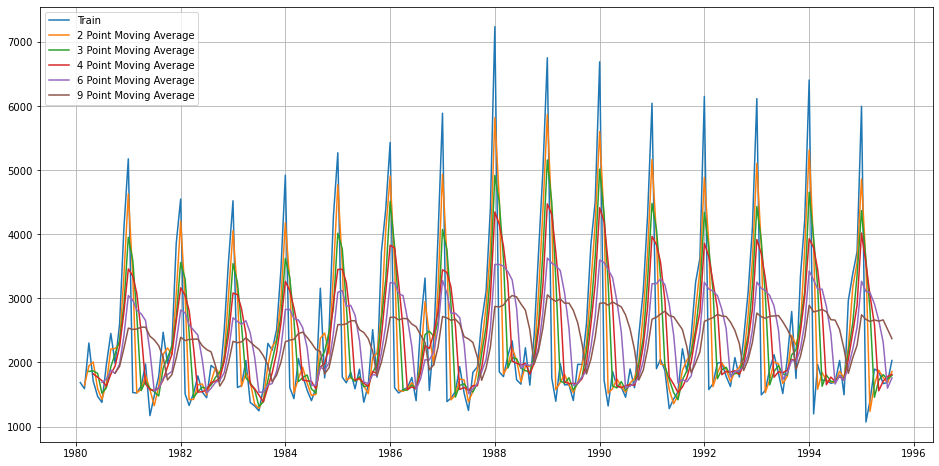

In [89]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [90]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

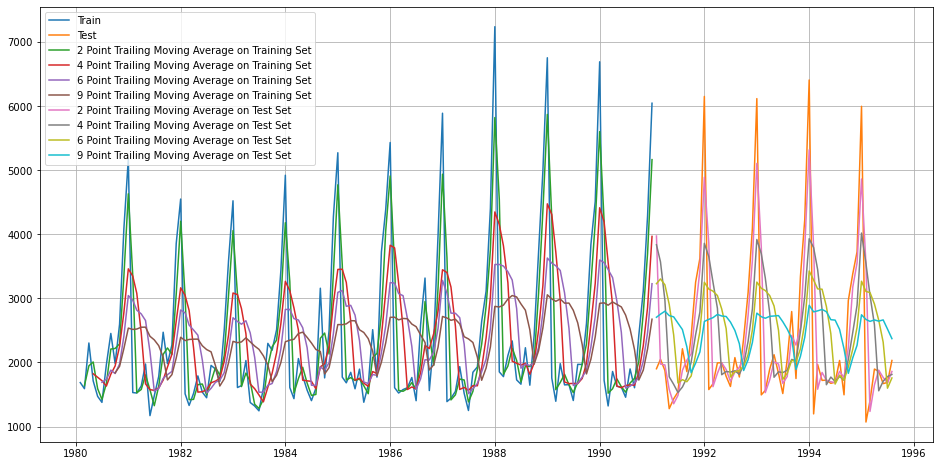

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [92]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 MAPE is 46.86


In [93]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.081804      38.90
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

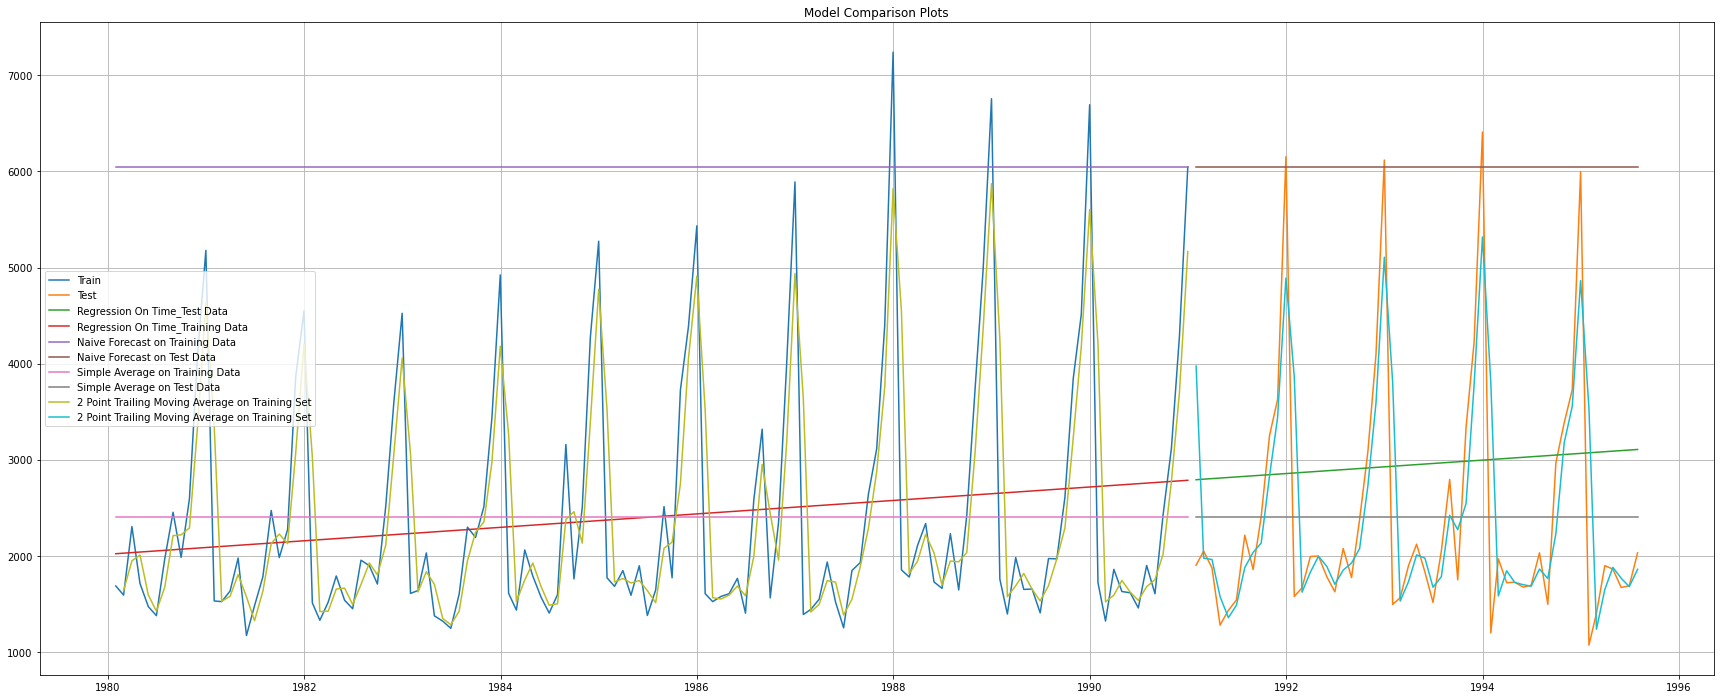

In [94]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [95]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [96]:
SES_train = train.copy()
SES_test = test.copy()

In [97]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [98]:
model_SES_autofit = model_SES.fit()

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [99]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745971,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [100]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling      predict
Time_Stamp                        
1980-01-31       1686  1818.504754
1980-02-29       1591  1811.931644
1980-03-31       2304  1800.971976
1980-04-30       1712  1825.925486
1980-05-31       1471  1820.274030

In [101]:
len(SES_test)

55

In [102]:
SES_train.tail()

Sparkling      predict
Time_Stamp                        
1990-08-31       1605  2469.860036
1990-09-30       2424  2426.957271
1990-10-31       3116  2426.810571
1990-11-30       4286  2460.998914
1990-12-31       6047  2551.531011

In [103]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

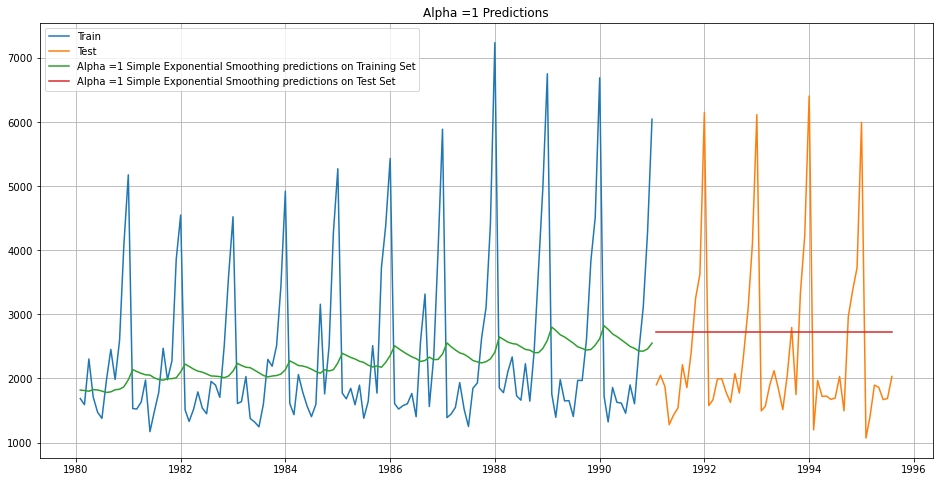

In [104]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

In [105]:
rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1315.232 MAPE is 39.92


In [106]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1316.035 MAPE is 45.47


In [107]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    1389.135175      50.15
NaiveModel                          3864.279352     152.87
SimpleAverageModel                  1275.081804      38.90
2pointTrailingMovingAverage          813.400684      19.70
4pointTrailingMovingAverage         1156.589694      35.96
6pointTrailingMovingAverage         1283.927428      43.86
9pointTrailingMovingAverage         1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing  1316.034674      45.47

In [108]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [109]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [110]:
resultsDf_6

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.3  1359.511747       43.73  1935.507132      75.66
1           0.4  1352.588879       42.75  2311.919615      91.55
2           0.5  1344.004369       41.16  2666.351413     106.27
3           0.6  1338.805381       39.80  2979.204388     118.77
4           0.7  1338.844308       38.55  3249.944092     129.34
5           0.8  1344.462091       37.60  3483.801006     138.34
6           0.9  1355.723518       36.79  3686.794285     146.08
7           1.0  1373.082528       35.83  3864.279352     152.87

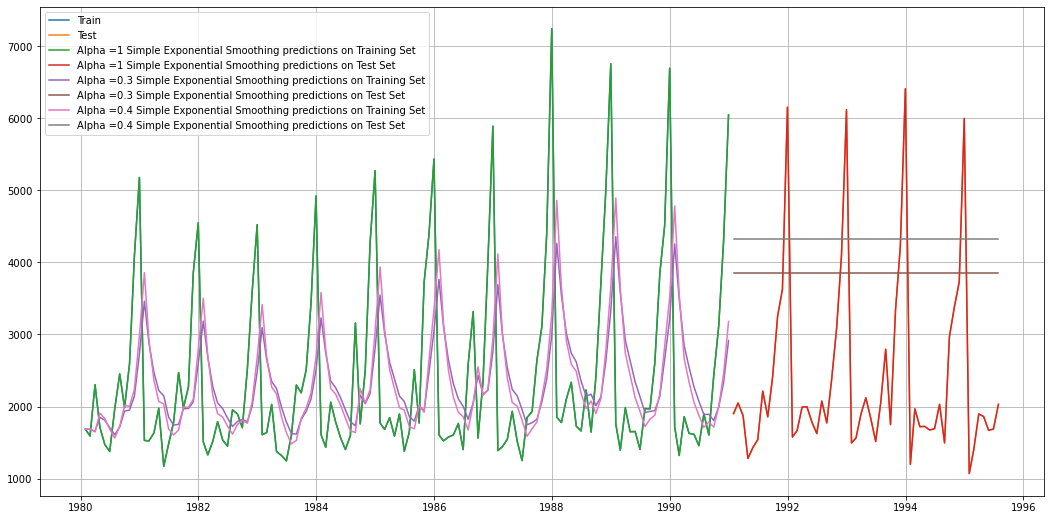

In [111]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['Sparkling'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['Sparkling'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [112]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1389.135175      50.15
NaiveModel                            3864.279352     152.87
SimpleAverageModel                    1275.081804      38.90
2pointTrailingMovingAverage            813.400684      19.70
4pointTrailingMovingAverage           1156.589694      35.96
6pointTrailingMovingAverage           1283.927428      43.86
9pointTrailingMovingAverage           1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing    1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing  1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing  2311.919615      91.55

## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [113]:
DES_train = train.copy()
DES_test = test.copy()

In [114]:
model_DES = Holt(DES_train['Sparkling'])

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [115]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [116]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/2617115384.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/2617115384.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/2617115384.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/2617115384.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(s

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/2617115384.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/2617115384.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/2617115384.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/2617115384.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(s

In [117]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1592.292788       53.75  18259.110704   
1            0.3          0.4  1682.573828       57.13  26069.841401   
2            0.3          0.5  1771.710791       59.92  34401.512440   
3            0.3          0.6  1848.576510       62.06  42162.748095   
4            0.3          0.7  1899.949006       62.87  47832.397419   
..           ...          ...          ...         ...           ...   
59           1.0          0.6  1753.402326       45.75  49327.087977   
60           1.0          0.7  1825.187155       47.97  52655.765663   
61           1.0          0.8  1902.013709       50.11  55442.273880   
62           1.0          0.9  1985.368445       52.03  57823.177011   
63           1.0          1.0  2077.672157       53.81  59877.076519   

    Test MAPE  
0      675.28  
1      960.18  
2     1264.55  
3     1548.94  
4     1757.91  
..        ...  
59    1824.42  
60    1945.23  
61    2046.36  
62    2132.75  
63    2207.28  

[64 rows x 6 columns]

In [118]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1592.292788       53.75  18259.110704   
8            0.4          0.3  1569.338606       50.06  23878.496940   
1            0.3          0.4  1682.573828       57.13  26069.841401   
16           0.5          0.3  1530.575845       45.92  27095.532414   
24           0.6          0.3  1506.449870       42.79  29070.722592   

    Test MAPE  
0      675.28  
8      886.00  
1      960.18  
16    1007.39  
24    1082.18

In [119]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1592.292788       53.75  18259.110704   
8            0.4          0.3  1569.338606       50.06  23878.496940   
1            0.3          0.4  1682.573828       57.13  26069.841401   
16           0.5          0.3  1530.575845       45.92  27095.532414   
24           0.6          0.3  1506.449870       42.79  29070.722592   

    Test MAPE  
0      675.28  
8      886.00  
1      960.18  
16    1007.39  
24    1082.18

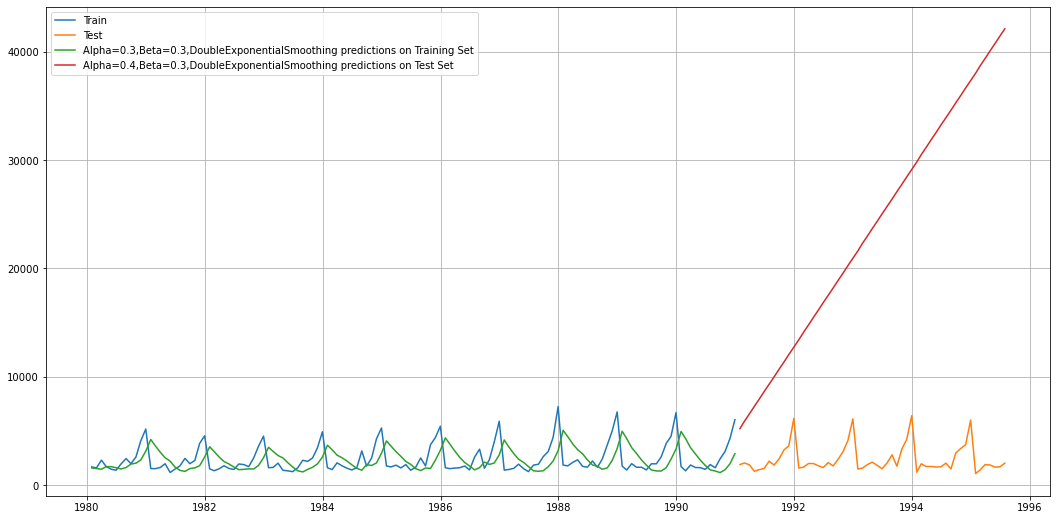

In [120]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.4, 0.3], label='Alpha=0.4,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [121]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][8]],'Test MAPE':[resultsDf_7['Test MAPE'][8]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                1389.135175      50.15
NaiveModel                                      3864.279352     152.87
SimpleAverageModel                              1275.081804      38.90
2pointTrailingMovingAverage                      813.400684      19.70
4pointTrailingMovingAverage                     1156.589694      35.96
6pointTrailingMovingAverage                     1283.927428      43.86
9pointTrailingMovingAverage                     1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing              1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing            1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing            2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  23878.496940     886.00

In [122]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.4,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                1389.135175      50.15
NaiveModel                                      3864.279352     152.87
SimpleAverageModel                              1275.081804      38.90
2pointTrailingMovingAverage                      813.400684      19.70
4pointTrailingMovingAverage                     1156.589694      35.96
6pointTrailingMovingAverage                     1283.927428      43.86
9pointTrailingMovingAverage                     1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing              1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing            1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing            2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  23878.496940     886.00
Alpha=0.4,Beta=0.3,DoubleExponentialSmoothing  18259.110704     675.28

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)
##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

<AxesSubplot:xlabel='Time_Stamp'>

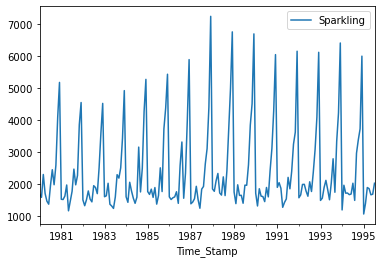

In [123]:
df_2.plot()

In [124]:
TES_train = train.copy()
TES_test = test.copy()

In [125]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M',seasonal_periods=12)

In [126]:
model_TES_autofit = model_TES.fit()

In [127]:
model_TES_autofit.params

{'smoothing_level': 0.11104076314043171,
 'smoothing_trend': 0.049348365324315684,
 'smoothing_seasonal': 0.36232794311434374,
 'damping_trend': nan,
 'initial_level': 2356.510722747615,
 'initial_trend': -9.729116859640436,
 'initial_seasons': array([0.71251887, 0.6830697 , 0.90596553, 0.8058403 , 0.65605007,
        0.65424925, 0.88796426, 1.13391231, 0.91920101, 1.21223812,
        1.87074711, 2.37464156]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [128]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
Time_Stamp                         
1980-01-31       1686   1672.126189
1980-02-29       1591   1597.919505
1980-03-31       2304   2109.557533
1980-04-30       1712   1888.767783
1980-05-31       1471   1515.336046

In [129]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1587.864666
1991-02-28       2049   1356.648339
1991-03-31       1874   1763.307702
1991-04-30       1279   1656.501849
1991-05-31       1432   1542.339421

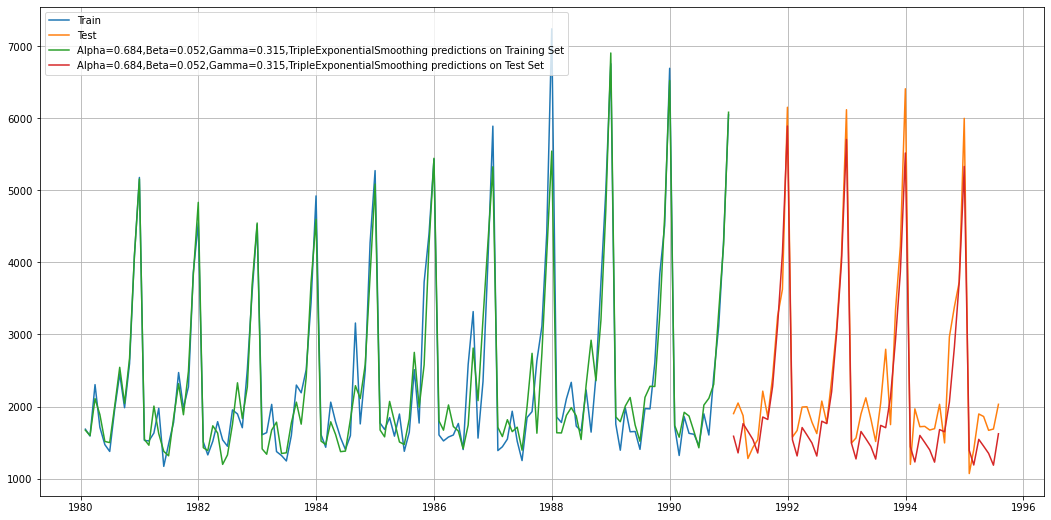

In [130]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [131]:
rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 355.772 MAPE is 10.19


In [132]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 403.126 MAPE is 13.89


In [133]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing                   1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       23878.496940     886.00
Alpha=0.4,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExpone...    403.125867      13.89

In [134]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [135]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 's

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 's

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/948100455.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

In [136]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0             0.3          0.3           0.3  3.977973e+02       11.33   
1             0.3          0.3           0.4  4.009853e+02       11.33   
2             0.3          0.3           0.5  4.107568e+02       11.47   
3             0.3          0.3           0.6  4.293935e+02       11.82   
4             0.3          0.3           0.7  4.600390e+02       12.56   
..            ...          ...           ...           ...         ...   
507           1.0          1.0           0.6  1.882994e+05     1658.66   
508           1.0          1.0           0.7  2.660015e+05     1554.57   
509           1.0          1.0           0.8  1.101923e+06     7348.46   
510           1.0          1.0           0.9  7.695708e+04     1220.71   
511           1.0          1.0           1.0  2.456050e+04      467.65   

        Test RMSE  Test MAPE  
0    3.613973e+02      12.09  
1    9.073380e+02      31.34  
2    1.592630e+03      54.32  
3    2.329189e+03      78.19  
4    3.202986e+03     105.62  
..            ...        ...  
507  4.386054e+06   84227.18  
508  8.649577e+06  188660.61  
509  2.700435e+05    5645.84  
510  2.472201e+05    6434.67  
511  1.256914e+05    2789.45  

[512 rows x 7 columns]

In [137]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
0             0.3          0.3           0.3  397.797318       11.33   
17            0.3          0.5           0.4  452.801424       12.62   
376           0.8          1.0           0.3  790.740655       22.27   
66            0.4          0.3           0.5  448.661280       12.52   
8             0.3          0.4           0.3  415.172097       11.85   

      Test RMSE  Test MAPE  
0    361.397300      12.09  
17   512.542557      18.07  
376  580.266110      17.99  
66   592.153132      20.44  
8    605.110479      18.66

In [138]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
0             0.3          0.3           0.3  397.797318       11.33   
376           0.8          1.0           0.3  790.740655       22.27   
17            0.3          0.5           0.4  452.801424       12.62   
8             0.3          0.4           0.3  415.172097       11.85   
65            0.4          0.3           0.4  426.864846       12.01   

      Test RMSE  Test MAPE  
0    361.397300      12.09  
376  580.266110      17.99  
17   512.542557      18.07  
8    605.110479      18.66  
65   666.314749      20.30

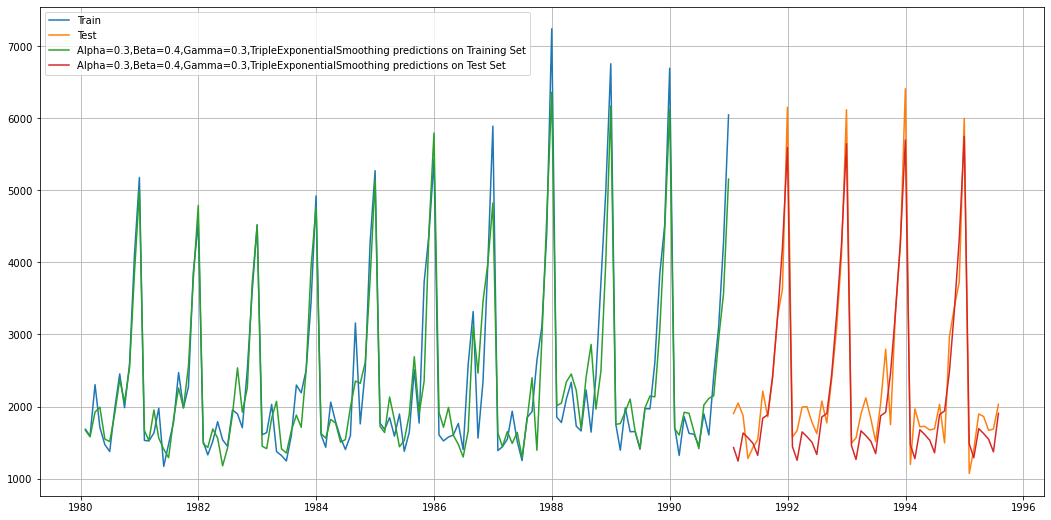

In [139]:
plt.figure(figsize=(18,9))

plt.plot(TES_train['Sparkling'], label='Train')

plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')




plt.legend(loc='best')
plt.grid();

In [140]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][8]],'Test MAPE':[resultsDf_8_2['Test MAPE'][8]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing                   1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       23878.496940     886.00
Alpha=0.4,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExpone...    403.125867      13.89
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...    605.110479      18.66

In [141]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][0]],'Test MAPE':[resultsDf_8_2['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing                   1316.034674      45.47
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       23878.496940     886.00
Alpha=0.4,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExpone...    403.125867      13.89
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...    605.110479      18.66
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    361.397300      12.09

## Check for stationarity of the whole Time Series data.

In [142]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    #rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    plt.grid()
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [143]:
dftest = adfuller(df_2['Sparkling'], autolag='AIC')

In [144]:
dftest

(-1.3604974548123385,
 0.6010608871634847,
 11,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2573.1222090270685)

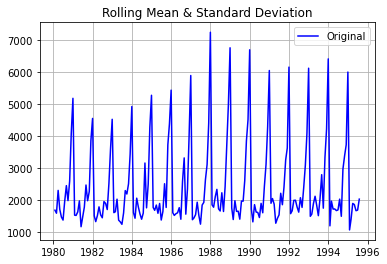

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [145]:
test_stationarity(df_2['Sparkling'])

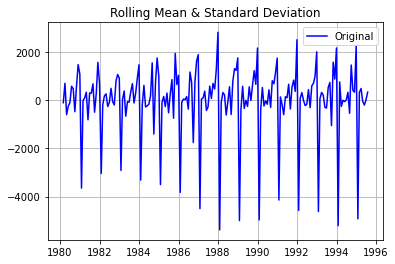

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [146]:
test_stationarity(df_2['Sparkling'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

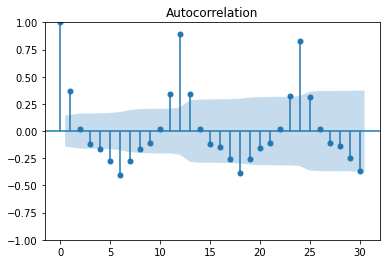

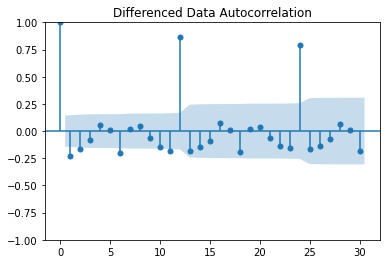

In [148]:
plot_acf(df_2['Sparkling'],lags=30)
plot_acf(df_2['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

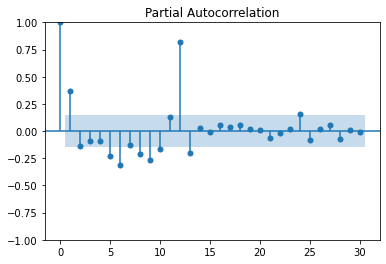

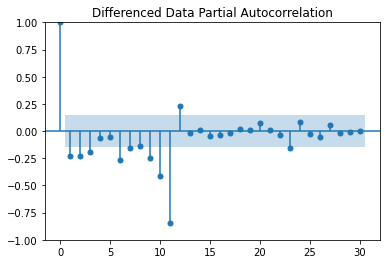

In [149]:
plot_pacf(df_2['Sparkling'],lags=30)
plot_pacf(df_2['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1991. Test Data is from the beginning of 2011 to the last time stamp provided.

In [150]:
train = df_2[df_2.index.year < 1991]
test = df_2[df_2.index.year >= 1991]

In [151]:
from IPython.display import display

In [152]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [153]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

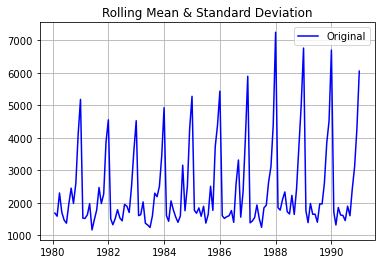

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [154]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at $\alpha$ = 0.05.

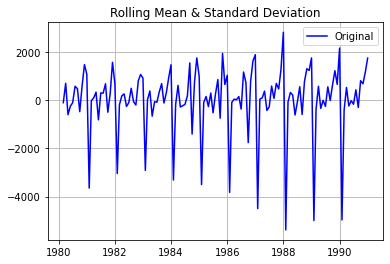

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [155]:
test_stationarity(train['Sparkling'].diff().dropna())

Now the Series is stationarity

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Manual Version of SARIMA 

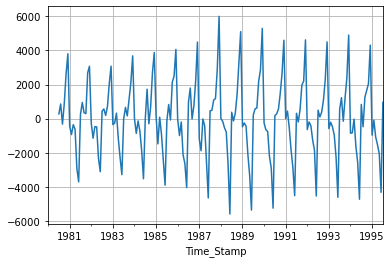

In [203]:
(df_2['Sparkling'].diff(6)).plot()
plt.grid();

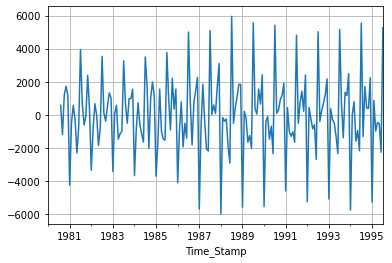

In [204]:
(df_2['Sparkling'].diff(6)).diff().plot()
plt.grid();

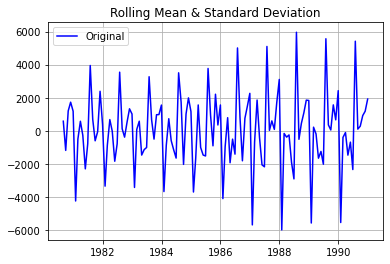

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [205]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

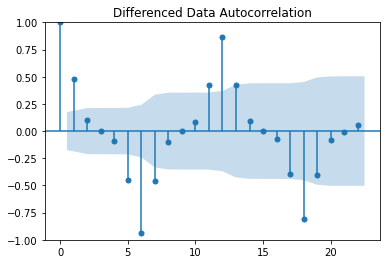

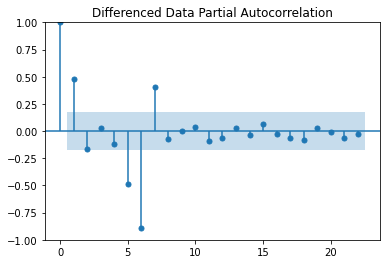

In [206]:
plot_acf(train['Sparkling'].diff(6).dropna(),title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff(6).dropna(),title='Differenced Data Partial Autocorrelation')
plt.show()

In [207]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64380D+00    |proj g|=  1.96142D-02

At iterate    5    f=  7.64017D+00    |proj g|=  2.63293D-03

At iterate   10    f=  7.63989D+00    |proj g|=  8.76244D-04

At iterate   15    f=  7.63962D+00    |proj g|=  1.18128D-02

At iterate   20    f=  7.61296D+00    |proj g|=  1.37684D-01

At iterate   25    f=  7.18583D+00    |proj g|=  4.88564D-01

At iterate   30    f=  6.67599D+00    |proj g|=  2.27490D-01

At iterate   35    f=  6.63108D+00    |proj g|=  4.86155D-02

At iterate   40    f=  6.63067D+00    |proj g|=  8.69608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


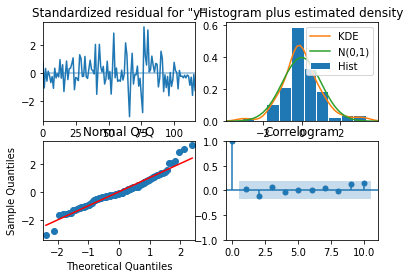

In [208]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [209]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [210]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1612.336994  424.293987     780.736061    2443.937926
1  1335.409487  436.750068     479.395083    2191.423892
2  1891.134062  437.622432    1033.409857    2748.858267
3  1718.649042  437.715594     860.742242    2576.555841
4  1696.956264  437.731313     839.018655    2554.893872

In [211]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

334.33474399792243


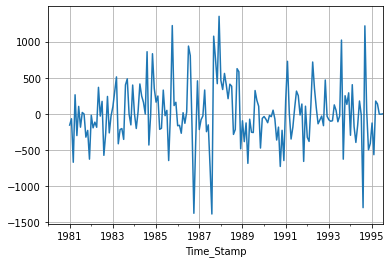

In [212]:
(df_2['Sparkling'].diff(12)).plot()
plt.grid();

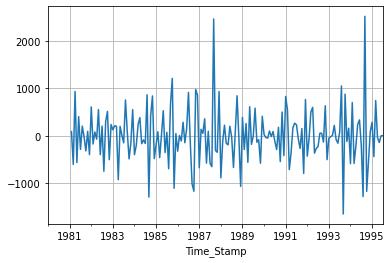

In [213]:
(df_2['Sparkling'].diff(12)).diff().plot()
plt.grid();

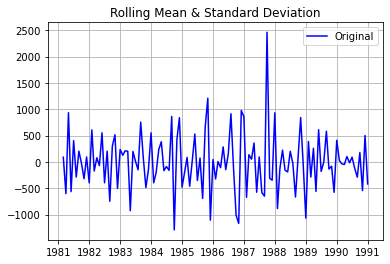

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [214]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

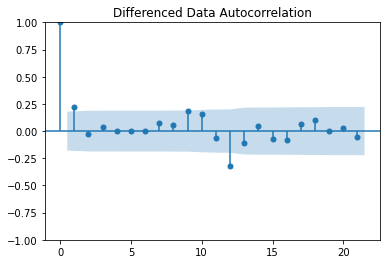

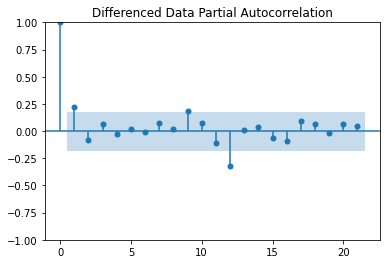

In [215]:
plot_acf(train['Sparkling'].diff(12).dropna(),title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff(12).dropna(),title='Differenced Data Partial Autocorrelation')
plt.show()

In [216]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95940D+00    |proj g|=  2.08291D-01

At iterate    5    f=  5.92847D+00    |proj g|=  9.11719D-03

At iterate   10    f=  5.92817D+00    |proj g|=  6.14980D-04

At iterate   15    f=  5.92797D+00    |proj g|=  1.59009D-02

At iterate   20    f=  5.91866D+00    |proj g|=  9.06557D-02


 This problem is unconstrained.



At iterate   25    f=  5.91164D+00    |proj g|=  1.10725D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   3.804D-05   5.912D+00
  F =   5.9116381229467807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -780.336
Date:                            Wed, 30 Nov 2022   AIC                           1570.6

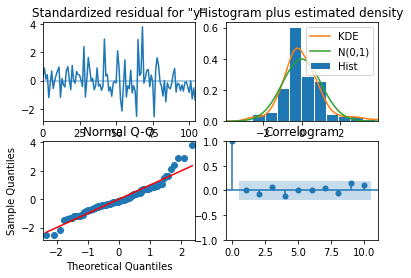

In [217]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [218]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [219]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1548.278527  407.077397     750.421490    2346.135563
1  1304.678380  417.375508     486.637415    2122.719344
2  1815.821979  419.269973     994.067932    2637.576026
3  1641.835522  420.423051     817.821483    2465.849561
4  1552.093283  421.468791     726.029632    2378.156934

In [220]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

375.61400369264646


In [156]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

#p = 0  to 2
#d = 1
#q = 0 to 2

import itertools
p = q = range(0, 3)
d = range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [157]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [158]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918632
ARIMA(0, 1, 2) - AIC:2234.4083231261075
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946699257
ARIMA(1, 1, 2) - AIC:2234.527200452215
ARIMA(2, 1, 0) - AIC:2260.36574396809


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 1) - AIC:2233.7776262083544
ARIMA(2, 1, 2) - AIC:2213.5092126923055


In [159]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [160]:
/auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 30 Nov 2022   AIC                           2213.509
Time:                        15:09:29   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.780      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [161]:
len(test)

55

In [162]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [163]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape_model19_test=MAPE(test['Sparkling'],predicted_auto_ARIMA)

print(rmse)
print(mape_model19_test)

1299.9802499817208
43.2


In [164]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape_model19_test]}
                           ,index=['Auto ARIMA(2,1,2)'])

resultsDf_1

Test RMSE  Test MAPE
Auto ARIMA(2,1,2)  1299.98025       43.2

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.


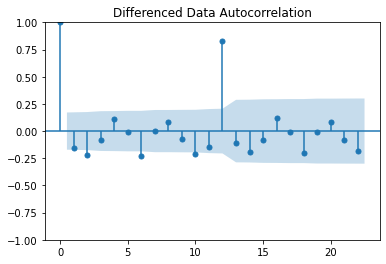

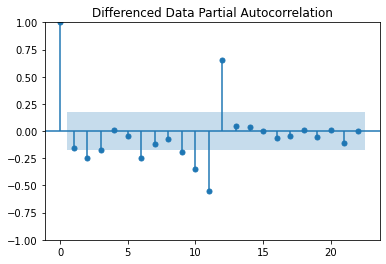

In [165]:
plot_acf(train['Sparkling'].diff().dropna(),title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),title='Differenced Data Partial Autocorrelation')
plt.show()

In [166]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(2,1,1),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1112.889
Date:                Wed, 30 Nov 2022   AIC                           2233.778
Time:                        15:09:30   BIC                           2245.278
Sample:                    01-31-1980   HQIC                          2238.451
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5194      0.119      4.359      0.000       0.286       0.753
ar.L2         -0.1782      0.196     -0.908      0.364      -0.563       0.206
ma.L1         -0.9993      0.667     -1.499      0.1

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [167]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [168]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape_model20_test=MAPE(test['Sparkling'],predicted_manual_ARIMA)

print(rmse)
print(mape_model20_test)

1300.7213832847617
39.86


In [169]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape_model20_test]}
                           ,index=['Manual ARIMA(2,1,1)'])


resultsDf_1 = pd.concat([resultsDf_1,temp_resultsDf])

resultsDf_1

Test RMSE  Test MAPE
Auto ARIMA(2,1,2)    1299.980250      43.20
Manual ARIMA(2,1,1)  1300.721383      39.86

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

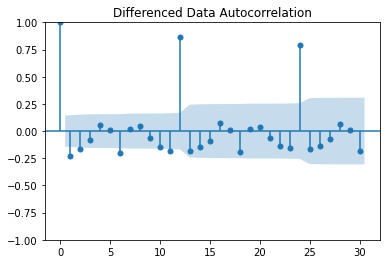

In [170]:
plot_acf(df_2['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

# Setting the seasonality as 6 for the first iteration of the auto SARIMA model.


In [171]:
itertools.product(p, d, q)

In [172]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [173]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [174]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52034D+00    |proj g|=  1.10083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.712D-06   8.520D+00
  F =   8.5203019685086989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  7.51997D+00    |proj g|=  7.39560D-03

At iterate   15    f=  7.51565D+00    |proj g|=  9.94381D-02

At iterate   20    f=  7.39131D+00    |proj g|=  1.33372D-01

At iterate   25    f=  7.38499D+00    |proj g|=  1.50575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   7.836D-07   7.385D+00
  F =   7.3849831579133083     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536891133
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  7.46020D+00    |proj g|=  1.64487D-02

At iterate   15    f=  7.45988D+00    |proj g|=  1.33224D-03

At iterate   20    f=  7.45957D+00    |proj g|=  1.90090D-02

At iterate   25    f=  7.42824D+00    |proj g|=  1.37525D-01

At iterate   30    f=  7.36930D+00    |proj g|=  4.92889D-02

At iterate   35    f=  7.30417D+00    |proj g|=  1.69168D-01

At iterate   40    f=  7.26870D+00    |proj g|=  5.16395D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     56      1     0     0   7.791D-05   7.269D+00
  F =   7.2686970162403854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510702
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83508D+00    |proj g|=  1.10065D-01

At iterate    5    f=  6.83064D+00    |proj g|=  1.72792D-02

At iterate   10    f=  6.83062D+00    |proj g|=  1.45599D-03

At iterate   15    f=  6.83062D+00    |proj g|=  2.68771D-03

At iterate   20    f=  6.83055D+00    |proj g|=  3.11765D-02

At iterate   25    f=  6.82658D+00    |proj g|=  9.51825D-02

At iterate   30    f=  6.82166D+00    |proj g|=  3.80833D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.39051D+00    |proj g|=  8.43604D-02

At iterate   25    f=  7.31954D+00    |proj g|=  7.54577D-02

At iterate   30    f=  7.23793D+00    |proj g|=  1.68868D-01
  ys=-4.058E-02  -gs= 2.094E-02 BFGS update SKIPPED

At iterate   35    f=  7.23556D+00    |proj g|=  2.25761D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     62      1     2     0   5.631D-06   7.236D+00
  F =   7.2355592195238669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.187633954301
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.08238D+00    |proj g|=  4.11486D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     16      1     0     0   1.506D-04   8.082D+00
  F =   8.0817168290850727     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878459
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04756D+00    |proj g|=  3.84203D-01

At iterate    5    f=  7.80051D+00    |proj g|=  1.37017D-01

At iterate   10 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     99      2     0     0   1.523D-04   7.570D+00
  F =   7.5701417795955148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298132158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41556D+00    |proj g|=  1.00070D-01

At iterate    5    f=  7.37258D+00    |proj g|=  2.17862D-01

At iterate   10    f=  7.33146D+00    |proj g|=  6.17250D-02

At iterate   15

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.39324D+00    |proj g|=  1.87027D-03

At iterate   15    f=  7.39164D+00    |proj g|=  3.05376D-02

At iterate   20    f=  7.29387D+00    |proj g|=  5.23177D-01

At iterate   25    f=  6.99541D+00    |proj g|=  2.61615D+00

At iterate   30    f=  6.82440D+00    |proj g|=  2.66475D-01

At iterate   35    f=  6.78596D+00    |proj g|=  1.26864D-01

At iterate   40    f=  6.78323D+00    |proj g|=  6.89758D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     52      1     0     0   2.349D-05   6.783D+00
  F =   6.7832264899994383     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   35    f=  6.71830D+00    |proj g|=  2.35934D+00

At iterate   40    f=  6.55977D+00    |proj g|=  3.97200D-01

At iterate   45    f=  6.55240D+00    |proj g|=  7.77273D-02

At iterate   50    f=  6.55169D+00    |proj g|=  8.71199D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     52     72      1     0     0   9.853D-06   6.552D+00
  F =   6.5516945121597576     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.647351210176
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.29849D+00    |proj g|=  7.01798D-03

At iterate   10    f=  7.29831D+00    |proj g|=  4.29153D-04

At iterate   15    f=  7.29816D+00    |proj g|=  8.47736D-03

At iterate   20    f=  7.28020D+00    |proj g|=  9.14986D-02

At iterate   25    f=  7.13670D+00    |proj g|=  1.98946D-01

At iterate   30    f=  7.10651D+00    |proj g|=  3.16234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     46      1     0     0   6.982D-05   7.106D+00
  F =   7.1064967646145840     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.11514585825

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.03690D+00    |proj g|=  5.04953D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     15      1     0     0   1.994D-04   8.037D+00
  F =   8.0368923065285074     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.739568923526
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94279D+00    |proj g|=  3.80429D-01

At iterate    5    f=  7.73982D+00    |proj g|=  1.78958D-01

At iterate   10 

 This problem is unconstrained.



At iterate    5    f=  7.28452D+00    |proj g|=  3.51518D-02

At iterate   10    f=  7.26605D+00    |proj g|=  7.24869D-02

At iterate   15    f=  7.24691D+00    |proj g|=  4.86598D-02

At iterate   20    f=  7.24598D+00    |proj g|=  2.38826D-03

At iterate   25    f=  7.24597D+00    |proj g|=  2.58548D-03

At iterate   30    f=  7.24560D+00    |proj g|=  3.20192D-02

At iterate   35    f=  7.21427D+00    |proj g|=  2.92768D-01

At iterate   40    f=  7.05070D+00    |proj g|=  4.61738D-02

At iterate   45    f=  6.97299D+00    |proj g|=  1.77491D-01

At iterate   50    f=  6.92318D+00    |proj g|=  3.29271D-02

At iterate   55    f=  6.92309D+00    |proj g|=  4.88094D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38213D+00    |proj g|=  3.00504D-02

At iterate    5    f=  7.37823D+00    |proj g|=  5.92081D-04

At iterate   10    f=  7.37795D+00    |proj g|=  6.04854D-03

At iterate   15    f=  7.35664D+00    |proj g|=  4.49044D-01

At iterate   20    f=  6.79457D+00    |proj g|=  3.73983D-01

At iterate   25    f=  6.74903D+00    |proj g|=  3.91946D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     46      1     0     0   6.647D-06   6.749D+00
  F =   6.7486882875184

 This problem is unconstrained.



At iterate    5    f=  7.37823D+00    |proj g|=  1.43386D-03

At iterate   10    f=  7.37820D+00    |proj g|=  5.92107D-04

At iterate   15    f=  7.37750D+00    |proj g|=  8.45509D-03

At iterate   20    f=  7.29671D+00    |proj g|=  1.75075D-01

At iterate   25    f=  6.78988D+00    |proj g|=  3.34393D-01

At iterate   30    f=  6.75095D+00    |proj g|=  2.52133D-02

At iterate   35    f=  6.74856D+00    |proj g|=  1.46227D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     48      1     0     0   4.070D-05   6.749D+00
  F =   6.7485571913304589     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   30    f=  6.88692D+00    |proj g|=  7.32476D-01

At iterate   35    f=  6.59723D+00    |proj g|=  3.18359D-01

At iterate   40    f=  6.50073D+00    |proj g|=  2.75589D-01

At iterate   45    f=  6.49204D+00    |proj g|=  4.46185D-02

At iterate   50    f=  6.49200D+00    |proj g|=  1.82000D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     53     68      1     0     0   9.623D-05   6.492D+00
  F =   6.4920030442455854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1727.8888036808346
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1953.3652245477635
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10712D+00    |proj g|=  2.07834D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   1.362D-05   8.107D+00
  F =   8.1067563062735548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:2146.1836648562185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.43121D+00    |proj g|=  4.61766D-03

At iterate   15    f=  7.43117D+00    |proj g|=  4.40313D-04

At iterate   20    f=  7.43110D+00    |proj g|=  2.27071D-02

At iterate   25    f=  7.42272D+00    |proj g|=  1.60266D-01

At iterate   30    f=  7.26098D+00    |proj g|=  7.04596D-01

At iterate   35    f=  7.22580D+00    |proj g|=  1.98271D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     64      1     0     0   2.936D-05   7.226D+00
  F =   7.2257157077147918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.588946836705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34028D+00    |proj g|=  2.46206D-02

At iterate    5    f=  7.33805D+00    |proj g|=  7.25162D-04

At iterate   10    f=  7.33778D+00    |proj g|=  2.15815D-02

At iterate   15    f=  7.30590D+00    |proj g|=  2.74932D-01

At iterate   20    f=  6.86718D+00    |proj g|=  2.17057D-01

At iterate   25    f=  6.83807D+00    |proj g|=  6.33478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pro

 This problem is unconstrained.



At iterate   20    f=  6.89400D+00    |proj g|=  3.83587D-01

At iterate   25    f=  6.83650D+00    |proj g|=  1.49353D-02

At iterate   30    f=  6.83648D+00    |proj g|=  3.37961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     41      1     0     0   3.380D-06   6.836D+00
  F =   6.8364778798600234     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1814.830160283046
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate   20    f=  7.32636D+00    |proj g|=  6.36422D-02

At iterate   25    f=  7.28307D+00    |proj g|=  9.25635D-02

At iterate   30    f=  7.18344D+00    |proj g|=  2.24549D-01

At iterate   35    f=  6.84894D+00    |proj g|=  1.01004D+00

At iterate   40    f=  6.76449D+00    |proj g|=  1.53684D-01

At iterate   45    f=  6.74031D+00    |proj g|=  9.84582D-02

At iterate   50    f=  6.74004D+00    |proj g|=  1.16253D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     51     65      1     0     0   2.963D-06   6.740D+00
  F =   6.7400436582100927     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40006D+00    |proj g|=  3.91356D-01

At iterate    5    f=  7.36050D+00    |proj g|=  7.84931D-02

At iterate   10    f=  7.35875D+00    |proj g|=  4.25758D-04

At iterate   15    f=  7.35874D+00    |proj g|=  9.78857D-03

At iterate   20    f=  7.35751D+00    |proj g|=  1.50458D-01

At iterate   25    f=  7.25603D+00    |proj g|=  2.27205D-01

At iterate   30    f=  7.18991D+00    |proj g|=  6.72522D-02

At iterate   35    f=  7.18335D+00    |proj g|=  1.34840D-02

At iterate   40    f=  7.18332D+00    |proj g|=  8.16870D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1906.3976381398377
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04601D+00    |proj g|=  3.02972D-01

At iterate    5    f=  7.97818D+00    |proj g|=  2.44247D-02

At iterate   10    f=  7.97810D+00    |proj g|=  2.95783D-04

At iterate   15    f=  7.97802D+00    |proj g|=  2.03718D-02

At iterate   20    f=  7.97075D+00    |proj g|=  1.16764D-01

At iterate   25    f=  7.96086D+00    |proj g|=  2.06565D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99493D+00    |proj g|=  3.39286D-01

At iterate    5    f=  7.81473D+00    |proj g|=  1.49726D-01

At iterate   10    f=  7.75442D+00    |proj g|=  1.24562D-01

At iterate   15    f=  7.74861D+00    |proj g|=  6.92918D-03

At iterate   20    f=  7.74859D+00    |proj g|=  1.89253D-03

At iterate   25    f=  7.74850D+00    |proj g|=  2.97328D-02

At iterate   30    f=  7.74271D+00    |proj g|=  1.52895D-01

At iterate   35    f=  7.71304D+00    |proj g|=  1.83860D-01

At iterate   40    f=  7.56570D+00    |proj g|=  2.65159D-01

At iterate   45    f=  7.55907D+00    |proj g|=  3.68464D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   30    f=  7.30024D+00    |proj g|=  4.55358D-02

At iterate   35    f=  7.28090D+00    |proj g|=  1.34196D-01

At iterate   40    f=  7.15206D+00    |proj g|=  2.75807D-01

At iterate   45    f=  7.09443D+00    |proj g|=  1.38369D+00

At iterate   50    f=  7.05734D+00    |proj g|=  8.06447D-01

At iterate   55    f=  7.00981D+00    |proj g|=  1.44793D-01

At iterate   60    f=  6.98606D+00    |proj g|=  1.58994D-01

At iterate   65    f=  6.98515D+00    |proj g|=  1.69311D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     69     94      1     0     0   5.210D-05   6.985D+00
  F =   6.98514213621

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1776.941767099988
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32702D+00    |proj g|=  5.04959D-01

At iterate    5    f=  7.30074D+00    |proj g|=  1.47750D-02

At iterate   10    f=  7.29984D+00    |proj g|=  1.20755D-03

At iterate   15    f=  7.29978D+00    |proj g|=  2.50110D-03

At iterate   20    f=  7.29573D+00    |proj g|=  5.79064D-02

At iterate   25    f=  7.12719D+00    |proj g|=  2.00694D-01

At iterate   30    f=  6.76951D+00    |proj g|=  3.42382D-01

At iterate   35    f=  6.69304D+00    |proj g|=  1.15807D-02

At iterate   40    f=  6.69251D+00    |proj g|=  2.87162D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of a

 This problem is unconstrained.



At iterate   25    f=  7.15790D+00    |proj g|=  1.14903D-01

At iterate   30    f=  7.07929D+00    |proj g|=  1.15668D-01

At iterate   35    f=  6.96665D+00    |proj g|=  3.11664D-01

At iterate   40    f=  6.76395D+00    |proj g|=  1.36669D-01

At iterate   45    f=  6.67916D+00    |proj g|=  1.30550D+00

At iterate   50    f=  6.56966D+00    |proj g|=  1.18526D-01

At iterate   55    f=  6.55194D+00    |proj g|=  6.33601D-02

At iterate   60    f=  6.55070D+00    |proj g|=  3.09083D-03

At iterate   65    f=  6.55068D+00    |proj g|=  7.61184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     67    100   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:2089.1320924461043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33390D+00    |proj g|=  1.23568D-01

At iterate    5    f=  7.29813D+00    |proj g|=  4.00696D-03

At iterate   10    f=  7.29810D+00    |proj g|=  4.91205D-04

At iterate   15    f=  7.29797D+00    |proj g|=  8.83258D-03

At iterate   20    f=  7.29454D+00    |proj g|=  3.36028D-02

At iterate   25    f=  7.28845D+00    |proj g|=  4.19260D-02

At iterate   30    f=  7.26170D+00    |proj g|=  4.14140D-01

At iterate   35    f=  7.22920D+00    |proj g|=  3.94936D-01

At iterate   40    f=  7.18354D+00    |proj g|=  9.79647D-02

At iterate   45    f=  7.18309D+00    |proj g|=  1.78385D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sear

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.97208D+00    |proj g|=  3.76019D-02

At iterate   25    f=  7.95613D+00    |proj g|=  1.37464D-01

At iterate   30    f=  7.94911D+00    |proj g|=  7.77128D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   1.095D-06   7.949D+00
  F =   7.9491081478297323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2108.564551027049
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate    5    f=  7.28371D+00    |proj g|=  2.78260D-02

At iterate   10    f=  7.26850D+00    |proj g|=  1.31490D-01

At iterate   15    f=  7.24559D+00    |proj g|=  6.11957D-03

At iterate   20    f=  7.24546D+00    |proj g|=  1.59614D-03

At iterate   25    f=  7.24526D+00    |proj g|=  3.38300D-03

At iterate   30    f=  7.24526D+00    |proj g|=  5.52915D-04

At iterate   35    f=  7.24501D+00    |proj g|=  1.14802D-02

At iterate   40    f=  7.22422D+00    |proj g|=  1.51191D-01

At iterate   45    f=  7.18395D+00    |proj g|=  6.58418D-01

At iterate   50    f=  7.11456D+00    |proj g|=  2.67584D-01

At iterate   55    f=  6.94137D+00    |proj g|=  5.04224D-01

At iterate   60    f=  6.91371D+00    |proj g|=  2.23736D-01

At iterate   65    f=  6.91268D+00    |proj g|=  1.71734D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31811D+00    |proj g|=  3.69367D-02

At iterate    5    f=  7.31146D+00    |proj g|=  1.66695D-03

At iterate   10    f=  7.31059D+00    |proj g|=  7.59119D-03

At iterate   15    f=  7.31035D+00    |proj g|=  5.95877D-04

At iterate   20    f=  7.31021D+00    |proj g|=  6.14790D-03

At iterate   25    f=  7.29363D+00    |proj g|=  1.26272D-01

At iterate   30    f=  6.98540D+00    |proj g|=  5.76422D-01

At iterate   35    f=  6.69482D+00    |proj g|=  9.10977D-02

At iterate   40    f=  6.67453D+00    |proj g|=  1.00967D-01

At iterate   45    f=  6.67206D+00    |proj g|=  7.13131D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   30    f=  6.87354D+00    |proj g|=  5.19472D-01

At iterate   35    f=  6.79938D+00    |proj g|=  1.69110D-01

At iterate   40    f=  6.69573D+00    |proj g|=  4.89728D-01

At iterate   45    f=  6.67447D+00    |proj g|=  4.32069D-02

At iterate   50    f=  6.67145D+00    |proj g|=  6.48363D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     54     65      1     0     0   7.814D-05   6.671D+00
  F =   6.6714333351316846     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1775.2584004747648
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  7.17900D+00    |proj g|=  1.03024D-03

At iterate   15    f=  7.17861D+00    |proj g|=  1.25592D-02

At iterate   20    f=  7.17841D+00    |proj g|=  8.86758D-04

At iterate   25    f=  7.17829D+00    |proj g|=  3.16366D-03

At iterate   30    f=  7.16876D+00    |proj g|=  3.07410D-02

At iterate   35    f=  7.15089D+00    |proj g|=  2.26818D-02

At iterate   40    f=  7.13133D+00    |proj g|=  1.35465D-01

At iterate   45    f=  7.09810D+00    |proj g|=  3.05806D-01

At iterate   50    f=  7.07270D+00    |proj g|=  1.05977D-01

At iterate   55    f=  6.94377D+00    |proj g|=  2.52027D-01

At iterate   60    f=  6.74257D+00    |proj g|=  4.65319D-01

At iterate   65    f=  6.50169D+00    |proj g|=  1.07492D-01

At iterate   70    f=  6.48425D+00    |proj g|=  3.08903D-02

At iterate   75    f=  6.48364D+00    |proj g|=  1.40859D-02

At iterate   80    f=  6.48363D+00    |proj g|=  3.22875D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.45544D+00    |proj g|=  9.04348D-03

At iterate   15    f=  7.43484D+00    |proj g|=  1.10929D-01

At iterate   20    f=  7.33041D+00    |proj g|=  1.92408D-02

At iterate   25    f=  7.33014D+00    |proj g|=  1.48693D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   2.079D-06   7.330D+00
  F =   7.3301369038199828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1945.1561426084754
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate   35    f=  7.24693D+00    |proj g|=  3.12083D-01

At iterate   40    f=  7.21087D+00    |proj g|=  3.05997D-02

At iterate   45    f=  7.21073D+00    |proj g|=  1.49960D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     55      1     0     0   1.500D-05   7.211D+00
  F =   7.2107336827695931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1915.6336922511725
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.24391D+00    |proj g|=  1.80491D-03

At iterate   10    f=  7.24384D+00    |proj g|=  1.24597D-03

At iterate   15    f=  7.24001D+00    |proj g|=  3.30508D-02

At iterate   20    f=  7.01049D+00    |proj g|=  6.90139D-01

At iterate   25    f=  6.73081D+00    |proj g|=  2.42461D-01

At iterate   30    f=  6.70601D+00    |proj g|=  2.70946D-02

At iterate   35    f=  6.70591D+00    |proj g|=  6.93789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     43      1     0     0   6.938D-05   6.706D+00
  F =   6.7059083974849250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  7.23633D+00    |proj g|=  5.97309D-04

At iterate   15    f=  7.23630D+00    |proj g|=  3.91392D-03

At iterate   20    f=  7.23465D+00    |proj g|=  4.40361D-02

At iterate   25    f=  7.10826D+00    |proj g|=  1.47988D-01

At iterate   30    f=  6.98768D+00    |proj g|=  2.25060D-01

At iterate   35    f=  6.63519D+00    |proj g|=  6.36241D-01

At iterate   40    f=  6.61524D+00    |proj g|=  5.83583D-02

At iterate   45    f=  6.61494D+00    |proj g|=  3.93013D-03

At iterate   50    f=  6.61493D+00    |proj g|=  1.80070D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2103.0859058223045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38284D+00    |proj g|=  1.31750D-01

At iterate    5    f=  7.34754D+00    |proj g|=  1.15941D-02

At iterate   10    f=  7.34724D+00    |proj g|=  1.21166D-03

At iterate   15    f=  7.34723D+00    |proj g|=  4.62087D-03

At iterate   20    f=  7.34631D+00    |proj g|=  6.35646D-02

At iterate   25    f=  7.30161D+00    |proj g|=  2.22277D-01

At iterate   30    f=  7.16332D+00    |proj g|=  2.96651D-02

At iterate   35    f=  7.16304D+00    |proj g|=  3.38850D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm o

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.72985D+00    |proj g|=  5.31134D-02

At iterate   15    f=  7.72907D+00    |proj g|=  4.53021D-03

At iterate   20    f=  7.72906D+00    |proj g|=  7.10108D-04

At iterate   25    f=  7.72904D+00    |proj g|=  7.04046D-03

At iterate   30    f=  7.72751D+00    |proj g|=  2.54678D-01

At iterate   35    f=  7.69213D+00    |proj g|=  2.64734D-01

At iterate   40    f=  7.53020D+00    |proj g|=  4.65212D-01

At iterate   45    f=  7.52118D+00    |proj g|=  5.15914D-02

At iterate   50    f=  7.52034D+00    |proj g|=  2.13608D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     52     67   

 This problem is unconstrained.



At iterate    5    f=  7.33115D+00    |proj g|=  5.01429D-02

At iterate   10    f=  7.30243D+00    |proj g|=  2.47318D-01

At iterate   15    f=  7.28926D+00    |proj g|=  4.35130D-02

At iterate   20    f=  7.28804D+00    |proj g|=  2.39668D-03

At iterate   25    f=  7.28803D+00    |proj g|=  1.06425D-03

At iterate   30    f=  7.28796D+00    |proj g|=  1.81385D-02

At iterate   35    f=  7.28209D+00    |proj g|=  9.05932D-02

At iterate   40    f=  7.18160D+00    |proj g|=  1.00185D-01

At iterate   45    f=  7.15733D+00    |proj g|=  3.86812D-02

At iterate   50    f=  7.01245D+00    |proj g|=  5.19213D-01

At iterate   55    f=  6.96566D+00    |proj g|=  4.10251D-02

At iterate   60    f=  6.96508D+00    |proj g|=  2.47880D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  7.22874D+00    |proj g|=  6.18879D-03

At iterate   10    f=  7.22827D+00    |proj g|=  6.02414D-04

At iterate   15    f=  7.22785D+00    |proj g|=  8.03756D-03

At iterate   20    f=  7.19965D+00    |proj g|=  4.92532D-02

At iterate   25    f=  7.17394D+00    |proj g|=  2.73479D-02

At iterate   30    f=  7.05540D+00    |proj g|=  1.72635D-01

At iterate   35    f=  6.75895D+00    |proj g|=  8.40900D-02

At iterate   40    f=  6.75583D+00    |proj g|=  5.79028D-03

At iterate   45    f=  6.75338D+00    |proj g|=  5.52814D-01

At iterate   50    f=  6.63469D+00    |proj g|=  1.36349D-01

At iterate   55    f=  6.62605D+00    |proj g|=  6.55917D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


At iterate   15    f=  7.22683D+00    |proj g|=  1.76829D-02

At iterate   20    f=  7.18914D+00    |proj g|=  6.55006D-02

At iterate   25    f=  7.14184D+00    |proj g|=  1.32292D-01

At iterate   30    f=  7.09682D+00    |proj g|=  1.03992D-01

At iterate   35    f=  6.76761D+00    |proj g|=  2.51070D-01

At iterate   40    f=  6.75190D+00    |proj g|=  1.34048D-02

At iterate   45    f=  6.73762D+00    |proj g|=  2.52684D-01

At iterate   50    f=  6.64339D+00    |proj g|=  9.12580D-02

At iterate   55    f=  6.62674D+00    |proj g|=  8.03198D-02

At iterate   60    f=  6.62573D+00    |proj g|=  1.48690D-03

At iterate   65    f=  6.62573D+00    |proj g|=  2.11081D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

 This problem is unconstrained.



At iterate   10    f=  7.22276D+00    |proj g|=  6.33812D-04

At iterate   15    f=  7.22270D+00    |proj g|=  1.82036D-03

At iterate   20    f=  7.21940D+00    |proj g|=  2.13968D-02

At iterate   25    f=  7.20539D+00    |proj g|=  5.95759D-02

At iterate   30    f=  7.18228D+00    |proj g|=  1.10493D-01

At iterate   35    f=  7.14452D+00    |proj g|=  1.50127D-01

At iterate   40    f=  6.72332D+00    |proj g|=  2.22314D-01

At iterate   45    f=  6.56150D+00    |proj g|=  1.42857D-01

At iterate   50    f=  6.54676D+00    |proj g|=  3.54657D-02

At iterate   55    f=  6.54569D+00    |proj g|=  1.15854D-02

At iterate   60    f=  6.54561D+00    |proj g|=  5.42477D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  7.87744D+00    |proj g|=  7.44382D-02

At iterate   10    f=  7.87263D+00    |proj g|=  1.71044D-02

At iterate   15    f=  7.85447D+00    |proj g|=  2.72320D-01

At iterate   20    f=  7.83082D+00    |proj g|=  1.62840D-01

At iterate   25    f=  7.82911D+00    |proj g|=  9.18220D-03

At iterate   30    f=  7.82910D+00    |proj g|=  4.11749D-03

At iterate   35    f=  7.82871D+00    |proj g|=  1.37377D-01

At iterate   40    f=  7.81290D+00    |proj g|=  8.69705D-01

At iterate   45    f=  7.79323D+00    |proj g|=  2.08786D-01

At iterate   50    f=  7.79102D+00    |proj g|=  4.65235D-02

At iterate   55    f=  7.79083D+00    |proj g|=  8.20877D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

 This problem is unconstrained.



At iterate   30    f=  7.29251D+00    |proj g|=  5.07905D-02

At iterate   35    f=  7.18093D+00    |proj g|=  1.89988D-01

At iterate   40    f=  7.10552D+00    |proj g|=  4.61194D-02

At iterate   45    f=  7.10526D+00    |proj g|=  8.79540D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     72      1     0     0   3.298D-05   7.105D+00
  F =   7.1052558348123105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.78754039045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.90348D+00    |proj g|=  1.23040D-02

At iterate   10    f=  7.86580D+00    |proj g|=  8.84900D-02

At iterate   15    f=  7.85990D+00    |proj g|=  4.48740D-03

At iterate   20    f=  7.85988D+00    |proj g|=  7.57244D-04

At iterate   25    f=  7.85988D+00    |proj g|=  2.88271D-03

At iterate   30    f=  7.85963D+00    |proj g|=  3.80586D-02

At iterate   35    f=  7.84254D+00    |proj g|=  1.30484D-01

At iterate   40    f=  7.83645D+00    |proj g|=  5.66151D-02

At iterate   45    f=  7.81711D+00    |proj g|=  2.86591D-01

At iterate   50    f=  7.81103D+00    |proj g|=  2.35057D-03

At iterate   55    f=  7.81102D+00    |proj g|=  1.04820D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   40    f=  7.64718D+00    |proj g|=  3.36018D-02

At iterate   45    f=  7.61217D+00    |proj g|=  1.13311D-01

At iterate   50    f=  7.38146D+00    |proj g|=  3.78550D-01

At iterate   55    f=  7.35470D+00    |proj g|=  2.77041D-02

At iterate   60    f=  7.35457D+00    |proj g|=  1.20669D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     61     81      1     0     0   1.495D-05   7.355D+00
  F =   7.3545677842419099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058950398642
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  7.26258D+00    |proj g|=  7.90388D-02

At iterate   15    f=  7.24204D+00    |proj g|=  3.62955D-02

At iterate   20    f=  7.24016D+00    |proj g|=  1.15998D-02

At iterate   25    f=  7.23606D+00    |proj g|=  5.69033D-02

At iterate   30    f=  7.23297D+00    |proj g|=  2.47562D-02

At iterate   35    f=  7.23287D+00    |proj g|=  3.89633D-03

At iterate   40    f=  7.23286D+00    |proj g|=  5.25547D-04

At iterate   45    f=  7.23285D+00    |proj g|=  2.42825D-03

At iterate   50    f=  7.23271D+00    |proj g|=  2.25330D-02

At iterate   55    f=  7.23028D+00    |proj g|=  8.30702D-02

At iterate   60    f=  7.18475D+00    |proj g|=  1.59706D-01

At iterate   65    f=  7.16854D+00    |proj g|=  4.00949D-02

At iterate   70    f=  7.15517D+00    |proj g|=  7.52907D-02

At iterate   75    f=  7.12931D+00    |proj g|=  2.89066D-01

At iterate   80    f=  7.04893D+00    |proj g|=  1.76324D-01

At iterate   85    f=  7.02793D+00    |proj g|=  2.39357D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.24307D+00    |proj g|=  1.51769D-02

At iterate   20    f=  7.24253D+00    |proj g|=  2.94655D-03

At iterate   25    f=  7.24009D+00    |proj g|=  2.53537D-02

At iterate   30    f=  7.11706D+00    |proj g|=  4.38174D-01

At iterate   35    f=  6.69587D+00    |proj g|=  5.26212D-01

At iterate   40    f=  6.64424D+00    |proj g|=  5.51840D-02

At iterate   45    f=  6.63615D+00    |proj g|=  1.22203D-02

At iterate   50    f=  6.63521D+00    |proj g|=  3.51944D-02

At iterate   55    f=  6.63143D+00    |proj g|=  3.66292D-02

At iterate   60    f=  6.63000D+00    |proj g|=  3.23138D-02

At iterate   65    f=  6.62879D+00    |proj g|=  5.39379D-03

At iterate   70    f=  6.62804D+00    |proj g|=  1.02854D-02

At iterate   75    f=  6.62759D+00    |proj g|=  4.36008D-03

At iterate   80    f=  6.62723D+00    |proj g|=  1.22756D-02

At iterate   85    f=  6.62704D+00    |proj g|=  2.87327D-03

At iterate   90    f=  6.62687D+00    |proj g|=  5.22366D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  7.24261D+00    |proj g|=  4.06137D-03

At iterate   25    f=  7.24231D+00    |proj g|=  3.94384D-03

At iterate   30    f=  7.23836D+00    |proj g|=  1.60122D-02

At iterate   35    f=  7.15995D+00    |proj g|=  1.70080D-01

At iterate   40    f=  7.08040D+00    |proj g|=  5.98449D-01

At iterate   45    f=  7.01557D+00    |proj g|=  5.47071D+00

At iterate   50    f=  6.89417D+00    |proj g|=  1.48733D-01

At iterate   55    f=  6.74807D+00    |proj g|=  5.87631D+00

At iterate   60    f=  6.69902D+00    |proj g|=  3.81413D-01

At iterate   65    f=  6.64845D+00    |proj g|=  2.98979D-01

At iterate   70    f=  6.64206D+00    |proj g|=  4.96112D-02

At iterate   75    f=  6.63501D+00    |proj g|=  3.72453D-02

At iterate   80    f=  6.63102D+00    |proj g|=  6.92797D-02

At iterate   85    f=  6.62948D+00    |proj g|=  1.06456D-02

At iterate   90    f=  6.62865D+00    |proj g|=  6.91891D-03

At iterate   95    f=  6.62806D+00    |proj g|=  8.23861D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  7.17754D+00    |proj g|=  3.33903D-03

At iterate   10    f=  7.17743D+00    |proj g|=  2.11341D-03

At iterate   15    f=  7.17730D+00    |proj g|=  2.53297D-03

At iterate   20    f=  7.17682D+00    |proj g|=  2.64648D-03

At iterate   25    f=  7.17665D+00    |proj g|=  7.80401D-03

At iterate   30    f=  7.16432D+00    |proj g|=  7.23585D-02

At iterate   35    f=  7.08758D+00    |proj g|=  1.00988D-01

At iterate   40    f=  7.03974D+00    |proj g|=  4.03032D-01

At iterate   45    f=  6.90068D+00    |proj g|=  8.98034D-01

At iterate   50    f=  6.71298D+00    |proj g|=  4.93353D-01

At iterate   55    f=  6.67208D+00    |proj g|=  8.13527D-02

At iterate   60    f=  6.63349D+00    |proj g|=  2.00923D-01

At iterate   65    f=  6.55881D+00    |proj g|=  3.53598D-01

At iterate   70    f=  6.49034D+00    |proj g|=  1.32639D-01

At iterate   75    f=  6.48424D+00    |proj g|=  2.73117D-02

At iterate   80    f=  6.48215D+00    |proj g|=  9.39943D-03

At iter

In [175]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678703
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888804
80  (2, 1, 2)  (2, 0, 2, 6)  1729.192580
17  (0, 1, 1)  (2, 0, 2, 6)  1741.647351
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379780

In [176]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18762D+00    |proj g|=  4.75189D-02

At iterate    5    f=  7.17910D+00    |proj g|=  6.65525D-03

At iterate   10    f=  7.17900D+00    |proj g|=  1.03024D-03

At iterate   15    f=  7.17861D+00    |proj g|=  1.25592D-02

At iterate   20    f=  7.17841D+00    |proj g|=  8.86758D-04

At iterate   25    f=  7.17829D+00    |proj g|=  3.16366D-03


 This problem is unconstrained.



At iterate   30    f=  7.16876D+00    |proj g|=  3.07410D-02

At iterate   35    f=  7.15089D+00    |proj g|=  2.26818D-02

At iterate   40    f=  7.13133D+00    |proj g|=  1.35465D-01

At iterate   45    f=  7.09810D+00    |proj g|=  3.05806D-01

At iterate   50    f=  7.07270D+00    |proj g|=  1.05977D-01

At iterate   55    f=  6.94377D+00    |proj g|=  2.52027D-01

At iterate   60    f=  6.74257D+00    |proj g|=  4.65319D-01

At iterate   65    f=  6.50169D+00    |proj g|=  1.07492D-01

At iterate   70    f=  6.48425D+00    |proj g|=  3.08903D-02

At iterate   75    f=  6.48364D+00    |proj g|=  1.40859D-02

At iterate   80    f=  6.48363D+00    |proj g|=  3.22875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

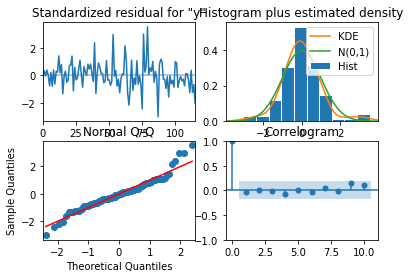

In [177]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()#Q–Q plot

## Predict on the Test Set using this model and evaluate the model.


In [178]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [179]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.381043  380.561793     584.493635    2076.268451
1  1177.096359  392.110785     408.573342    1945.619376
2  1625.932646  392.305610     857.027779    2394.837512
3  1546.295937  397.708170     766.802247    2325.789626
4  1308.562861  398.928258     526.677843    2090.447879

In [180]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
mape_model21_test=MAPE(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean)

print(rmse)
print(mape_model21_test)

627.0534968426654
22.56


In [181]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape_model20_test]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf_1 = pd.concat([resultsDf_1,temp_resultsDf])

resultsDf_1

Test RMSE  Test MAPE
Auto ARIMA(2,1,2)       1299.980250      43.20
Manual ARIMA(2,1,1)     1300.721383      39.86
SARIMA(1,1,2)(2,0,2,6)   627.053497      39.86

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.


In [182]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [183]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [184]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52034D+00    |proj g|=  1.10083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.712D-06   8.520D+00
  F =   8.5203019685086989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.50693D+00    |proj g|=  2.72461D-02

At iterate   25    f=  6.50437D+00    |proj g|=  1.99120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     37      1     0     0   6.445D-07   6.504D+00
  F =   6.5043688031198830     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236491
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94484D+00    |proj g|=  2.86769D-05

           * *

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  6.83010D+00    |proj g|=  9.31742D-03

At iterate   15    f=  6.82959D+00    |proj g|=  1.24440D-01

At iterate   20    f=  6.82239D+00    |proj g|=  1.20231D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     41      1     0     0   2.380D-05   6.822D+00
  F =   6.8219338262835514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388576
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   15    f=  6.21133D+00    |proj g|=  3.58489D-02

At iterate   20    f=  6.20924D+00    |proj g|=  2.66819D-02

At iterate   25    f=  6.20911D+00    |proj g|=  3.46551D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   3.466D-05   6.209D+00
  F =   6.2091114237011675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158571082
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  6.14370D+00    |proj g|=  1.89178D-04

At iterate   15    f=  6.14370D+00    |proj g|=  2.05381D-03

At iterate   20    f=  6.14349D+00    |proj g|=  3.47806D-02

At iterate   25    f=  6.14069D+00    |proj g|=  4.56020D-02

At iterate   30    f=  6.14011D+00    |proj g|=  1.50561D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   1.160D-06   6.140D+00
  F =   6.1401128992124230     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920797
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     39      1     0     0   1.707D-07   7.264D+00
  F =   7.2642760036236318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566387
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.67987D+00    |proj g|=  2.65556D-01

At iterate    5    f=  6.60887D+00    |proj g|=  3.95890D-03

At iterate   10    f=  6.60872D+00    |proj g|=  3.96863D-04
  ys=-1.806E-02

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.25182D+00    |proj g|=  1.28810D-02

At iterate   20    f=  7.22890D+00    |proj g|=  6.21565D-02

At iterate   25    f=  6.61164D+00    |proj g|=  6.82990D-01

At iterate   30    f=  6.55340D+00    |proj g|=  6.71605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     51      1     0     0   7.602D-06   6.553D+00
  F =   6.5533724218851246     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193776728
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  6.51779D+00    |proj g|=  2.13209D-02

At iterate   10    f=  6.51210D+00    |proj g|=  1.67353D-03

At iterate   15    f=  6.51207D+00    |proj g|=  6.77500D-04

At iterate   20    f=  6.51091D+00    |proj g|=  2.73466D-02

At iterate   25    f=  6.46410D+00    |proj g|=  1.46076D-01

At iterate   30    f=  5.94736D+00    |proj g|=  1.79600D-01

At iterate   35    f=  5.90965D+00    |proj g|=  1.40890D-02

At iterate   40    f=  5.90959D+00    |proj g|=  1.51567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     58      1     0     0   2.101D-05   5.910D+00
  F =   5.90959077801

 This problem is unconstrained.



At iterate    5    f=  6.63558D+00    |proj g|=  7.64597D-03

At iterate   10    f=  6.63551D+00    |proj g|=  1.48500D-03

At iterate   15    f=  6.62538D+00    |proj g|=  3.75752D-02

At iterate   20    f=  6.33595D+00    |proj g|=  3.11501D-01

At iterate   25    f=  6.05445D+00    |proj g|=  8.29121D-02

At iterate   30    f=  6.05180D+00    |proj g|=  1.55931D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     45      1     0     0   3.511D-07   6.052D+00
  F =   6.0517999826433604     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178

 This problem is unconstrained.



At iterate   15    f=  6.63363D+00    |proj g|=  2.55737D-02

At iterate   20    f=  6.57192D+00    |proj g|=  2.65870D-01

At iterate   25    f=  6.29259D+00    |proj g|=  8.82615D-02

At iterate   30    f=  6.04440D+00    |proj g|=  1.70582D-01

At iterate   35    f=  6.01980D+00    |proj g|=  2.31878D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     58      1     0     0   2.240D-05   6.020D+00
  F =   6.0197898047306291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084488861
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.


At iterate   10    f=  6.50894D+00    |proj g|=  1.34084D-03

At iterate   15    f=  6.50888D+00    |proj g|=  6.84898D-04

At iterate   20    f=  6.50860D+00    |proj g|=  6.51048D-03

At iterate   25    f=  6.49600D+00    |proj g|=  3.31183D-02

At iterate   30    f=  6.43000D+00    |proj g|=  2.77037D-01

At iterate   35    f=  5.94946D+00    |proj g|=  4.43660D-01

At iterate   40    f=  5.90395D+00    |proj g|=  5.21706D-02

At iterate   45    f=  5.90291D+00    |proj g|=  9.27374D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     65      1     0     0   1.025D-03   5.903D+00
  F =   5.902910537916

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  7.12109D+00    |proj g|=  1.90587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     41      1     0     0   7.391D-06   7.121D+00
  F =   7.1208818209098066     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.912800720189
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59897D+00    |proj g|=  2.74808D-01

At iterate    5    f=  6.51398D+00    |proj g|=  3.13285D-02

At iterate   10 

 This problem is unconstrained.



At iterate   15    f=  6.51089D+00    |proj g|=  1.95195D-03

At iterate   20    f=  6.50753D+00    |proj g|=  2.77542D-02

At iterate   25    f=  6.30026D+00    |proj g|=  2.15814D-01

At iterate   30    f=  6.25530D+00    |proj g|=  1.27157D-01

At iterate   35    f=  6.24957D+00    |proj g|=  4.90534D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     48      1     0     0   1.961D-05   6.250D+00
  F =   6.2495416252054525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890542396
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  6.75012D+00    |proj g|=  7.10271D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     49      1     0     0   3.270D-06   6.750D+00
  F =   6.7501236107237705     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332310754
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18760D+00    |proj g|=  4.58639D-02

At iterate    5    f=  7.18032D+00    |proj g|=  1.01371D-02

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  6.44035D+00    |proj g|=  2.87316D-03

At iterate   20    f=  6.43760D+00    |proj g|=  3.37024D-02

At iterate   25    f=  6.27970D+00    |proj g|=  1.52533D-01

At iterate   30    f=  5.94123D+00    |proj g|=  1.39211D+00

At iterate   35    f=  5.85693D+00    |proj g|=  1.09944D-01

At iterate   40    f=  5.85288D+00    |proj g|=  1.38310D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     55      1     0     0   5.461D-05   5.853D+00
  F =   5.8528807076585299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068218

 This problem is unconstrained.



At iterate   20    f=  6.61039D+00    |proj g|=  9.92765D-02

At iterate   25    f=  6.28017D+00    |proj g|=  4.03119D-01

At iterate   30    f=  6.04351D+00    |proj g|=  1.92251D-01

At iterate   35    f=  6.03775D+00    |proj g|=  7.75402D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     46      1     0     0   6.224D-07   6.038D+00
  F =   6.0377480206410850     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774492465
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   20    f=  6.62124D+00    |proj g|=  4.62252D-02

At iterate   25    f=  6.54721D+00    |proj g|=  1.50298D-01

At iterate   30    f=  6.10315D+00    |proj g|=  4.90138D-01

At iterate   35    f=  6.01772D+00    |proj g|=  8.22375D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     53      1     0     0   3.224D-05   6.017D+00
  F =   6.0172116665549069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438799704955
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.


At iterate   15    f=  6.43756D+00    |proj g|=  1.49204D-03

At iterate   20    f=  6.43750D+00    |proj g|=  1.65009D-03

At iterate   25    f=  6.43627D+00    |proj g|=  8.98855D-03

At iterate   30    f=  6.35098D+00    |proj g|=  2.45827D-01

At iterate   35    f=  6.02088D+00    |proj g|=  3.32549D-01

At iterate   40    f=  5.88591D+00    |proj g|=  3.50243D-01

At iterate   45    f=  5.85327D+00    |proj g|=  2.57480D-02

At iterate   50    f=  5.84904D+00    |proj g|=  1.49347D-01

At iterate   55    f=  5.84582D+00    |proj g|=  5.88540D-02

At iterate   60    f=  5.84517D+00    |proj g|=  5.04967D-03

At iterate   65    f=  5.84516D+00    |proj g|=  7.89825D-04

At iterate   70    f=  5.84516D+00    |proj g|=  1.01125D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized C

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.67055D+00    |proj g|=  5.75587D-02

At iterate   20    f=  6.49924D+00    |proj g|=  1.10772D-01

At iterate   25    f=  6.48966D+00    |proj g|=  1.04443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   2.519D-06   6.490D+00
  F =   6.4896547258921187     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279329655
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33297D+00    |proj g|=  4.13672D-02

At iterate    5    f=  7.32948D+00    |proj g|=  5.78112D-04

At iterate   10    f=  7.32945D+00    |proj g|=  2.29589D-03

At iterate   15    f=  7.32612D+00    |proj g|=  4.71109D-02

At iterate   20    f=  7.13832D+00    |proj g|=  2.66540D-01

At iterate   25    f=  6.74804D+00    |proj g|=  4.12522D-01

At iterate   30    f=  6.74445D+00    |proj g|=  1.66252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value



 This problem is unconstrained.



At iterate    5    f=  6.58825D+00    |proj g|=  1.00812D-02

At iterate   10    f=  6.58747D+00    |proj g|=  5.13888D-04

At iterate   15    f=  6.58716D+00    |proj g|=  1.76189D-02

At iterate   20    f=  6.54471D+00    |proj g|=  1.11555D-01

At iterate   25    f=  6.14680D+00    |proj g|=  7.61541D-01

At iterate   30    f=  6.08520D+00    |proj g|=  4.02775D-03

At iterate   35    f=  6.08519D+00    |proj g|=  5.39684D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     45      1     0     0   5.397D-06   6.085D+00
  F =   6.0851872736945287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.13724D+00    |proj g|=  1.72466D-01

At iterate   25    f=  6.11226D+00    |proj g|=  4.23100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   5.501D-06   6.112D+00
  F =   6.1122557121701435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129179
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58908D+00    |proj g|=  2.46980D-02

At iterate    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  6.58458D+00    |proj g|=  4.21260D-03

At iterate   20    f=  6.58429D+00    |proj g|=  5.43401D-03

At iterate   25    f=  6.54333D+00    |proj g|=  1.04730D-01

At iterate   30    f=  6.17970D+00    |proj g|=  2.73524D-01

At iterate   35    f=  6.08919D+00    |proj g|=  5.82455D-02

At iterate   40    f=  6.07782D+00    |proj g|=  1.06495D-02

At iterate   45    f=  6.07781D+00    |proj g|=  3.12619D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     54      1     0     0   3.126D-05   6.078D+00
  F =   6.0778076013092699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.36253D+00    |proj g|=  7.01929D-04

At iterate   15    f=  7.36222D+00    |proj g|=  1.36518D-02

At iterate   20    f=  7.33589D+00    |proj g|=  3.08737D-01

At iterate   25    f=  7.19483D+00    |proj g|=  1.93672D-02

At iterate   30    f=  7.19453D+00    |proj g|=  3.93827D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   3.968D-06   7.195D+00
  F =   7.1945299144438914     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974131874
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f=  7.29948D+00    |proj g|=  1.32527D-02

At iterate   20    f=  7.27727D+00    |proj g|=  1.18224D-01

At iterate   25    f=  7.25325D+00    |proj g|=  7.87960D-02

At iterate   30    f=  6.79565D+00    |proj g|=  1.21734D+00

At iterate   35    f=  6.69412D+00    |proj g|=  1.81707D-02

At iterate   40    f=  6.69373D+00    |proj g|=  3.41197D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     64      1     0     0   1.725D-05   6.694D+00
  F =   6.6937213890598084     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424467117

 This problem is unconstrained.



At iterate   10    f=  7.23074D+00    |proj g|=  6.06755D-04

At iterate   15    f=  7.23052D+00    |proj g|=  5.82554D-03

At iterate   20    f=  7.20838D+00    |proj g|=  8.28060D-02

At iterate   25    f=  7.14467D+00    |proj g|=  2.88861D-01

At iterate   30    f=  7.03881D+00    |proj g|=  1.66858D-01

At iterate   35    f=  6.77078D+00    |proj g|=  1.06079D+00

At iterate   40    f=  6.58638D+00    |proj g|=  3.75911D-01

At iterate   45    f=  6.55233D+00    |proj g|=  9.71964D-02

At iterate   50    f=  6.55194D+00    |proj g|=  7.28035D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     51     79   

 This problem is unconstrained.



At iterate   15    f=  6.49267D+00    |proj g|=  3.58479D-03

At iterate   20    f=  6.49141D+00    |proj g|=  1.50204D-02

At iterate   25    f=  6.43442D+00    |proj g|=  1.20514D-01

At iterate   30    f=  6.01028D+00    |proj g|=  2.28023D-01

At iterate   35    f=  5.91224D+00    |proj g|=  1.00548D-01

At iterate   40    f=  5.90657D+00    |proj g|=  3.19757D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     51      1     0     0   2.563D-05   5.907D+00
  F =   5.9065336614137154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248866132

 This problem is unconstrained.



At iterate    5    f=  6.55589D+00    |proj g|=  2.16797D-02

At iterate   10    f=  6.55337D+00    |proj g|=  5.44444D-04

At iterate   15    f=  6.55319D+00    |proj g|=  6.01839D-03

At iterate   20    f=  6.52239D+00    |proj g|=  8.04986D-02

At iterate   25    f=  6.00897D+00    |proj g|=  2.29959D-01

At iterate   30    f=  5.98722D+00    |proj g|=  8.25792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   6.076D-06   5.987D+00
  F =   5.9871824268369203     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606849

 This problem is unconstrained.



At iterate   10    f=  6.55238D+00    |proj g|=  5.98804D-04

At iterate   15    f=  6.55231D+00    |proj g|=  2.26859D-03

At iterate   20    f=  6.55097D+00    |proj g|=  2.01455D-02

At iterate   25    f=  6.48499D+00    |proj g|=  1.62057D-01

At iterate   30    f=  6.39060D+00    |proj g|=  8.38477D-02

At iterate   35    f=  6.21168D+00    |proj g|=  3.92727D-01

At iterate   40    f=  6.15120D+00    |proj g|=  2.27800D-02

At iterate   45    f=  6.06267D+00    |proj g|=  3.20879D-01

At iterate   50    f=  5.97631D+00    |proj g|=  5.69006D-02

At iterate   55    f=  5.96348D+00    |proj g|=  5.63541D-02

At iterate   60    f=  5.96331D+00    |proj g|=  7.50040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  6.49416D+00    |proj g|=  3.15239D-02

At iterate   10    f=  6.48959D+00    |proj g|=  1.12765D-03

At iterate   15    f=  6.48956D+00    |proj g|=  1.99846D-03

At iterate   20    f=  6.48939D+00    |proj g|=  6.15621D-03

At iterate   25    f=  6.46871D+00    |proj g|=  6.60763D-02

At iterate   30    f=  6.17977D+00    |proj g|=  2.64832D+00

At iterate   35    f=  5.93709D+00    |proj g|=  2.52302D-01

At iterate   40    f=  5.92136D+00    |proj g|=  1.44629D-01

At iterate   45    f=  5.91771D+00    |proj g|=  1.65098D-01

At iterate   50    f=  5.91656D+00    |proj g|=  7.98063D-03

At iterate   55    f=  5.91556D+00    |proj g|=  3.49793D-02

At iterate   60    f=  5.90707D+00    |proj g|=  1.53655D-01

At iterate   65    f=  5.90299D+00    |proj g|=  5.35435D-02

At iterate   70    f=  5.90115D+00    |proj g|=  3.81468D-02

At iterate   75    f=  5.90079D+00    |proj g|=  4.63126D-03

At iterate   80    f=  5.90078D+00    |proj g|=  2.06504D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.22568D+00    |proj g|=  2.86818D-01

At iterate   30    f=  7.12397D+00    |proj g|=  8.10726D-02

At iterate   35    f=  7.12037D+00    |proj g|=  5.57256D-03

At iterate   40    f=  7.12034D+00    |proj g|=  4.40497D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     50      1     0     0   5.336D-06   7.120D+00
  F =   7.1203440558744280     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.770830750849
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  6.51068D+00    |proj g|=  7.95718D-04

At iterate   15    f=  6.51064D+00    |proj g|=  6.45965D-04

At iterate   20    f=  6.51061D+00    |proj g|=  6.31398D-03

At iterate   25    f=  6.50850D+00    |proj g|=  7.67451D-02

At iterate   30    f=  6.39168D+00    |proj g|=  2.67824D-01

At iterate   35    f=  6.25468D+00    |proj g|=  1.40357D-01

At iterate   40    f=  6.24103D+00    |proj g|=  4.30694D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     52      1     0     0   8.604D-06   6.241D+00
  F =   6.2410194778045724     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   15    f=  7.31039D+00    |proj g|=  2.05739D-03

At iterate   20    f=  7.30167D+00    |proj g|=  3.50624D-02

At iterate   25    f=  7.28330D+00    |proj g|=  5.29293D-02

At iterate   30    f=  6.87272D+00    |proj g|=  1.39963D+00

At iterate   35    f=  6.67518D+00    |proj g|=  6.52770D-02

At iterate   40    f=  6.67358D+00    |proj g|=  3.60220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     65      1     0     0   2.218D-06   6.674D+00
  F =   6.6735832572973148     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799264

 This problem is unconstrained.



At iterate    5    f=  7.17907D+00    |proj g|=  8.79651D-04

At iterate   10    f=  7.17871D+00    |proj g|=  4.09597D-03

At iterate   15    f=  7.17843D+00    |proj g|=  1.15968D-03

At iterate   20    f=  7.17573D+00    |proj g|=  1.67628D-02

At iterate   25    f=  7.12874D+00    |proj g|=  1.93449D-01

At iterate   30    f=  6.76782D+00    |proj g|=  4.86060D-01

At iterate   35    f=  6.50262D+00    |proj g|=  4.32860D-01

At iterate   40    f=  6.48514D+00    |proj g|=  9.94326D-03

At iterate   45    f=  6.48483D+00    |proj g|=  2.03620D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     66   

 This problem is unconstrained.


At iterate   10    f=  6.43958D+00    |proj g|=  1.84167D-03

At iterate   15    f=  6.43872D+00    |proj g|=  5.42077D-03

At iterate   20    f=  6.43865D+00    |proj g|=  1.69617D-03

At iterate   25    f=  6.43530D+00    |proj g|=  1.98267D-02

At iterate   30    f=  6.41824D+00    |proj g|=  6.01063D-02

At iterate   35    f=  6.26443D+00    |proj g|=  2.44667D-01

At iterate   40    f=  5.88067D+00    |proj g|=  1.33908D-01

At iterate   45    f=  5.84202D+00    |proj g|=  2.52757D-02

At iterate   50    f=  5.83934D+00    |proj g|=  1.87521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     54     74    

 This problem is unconstrained.



At iterate   15    f=  6.56096D+00    |proj g|=  1.08615D-03

At iterate   20    f=  6.56084D+00    |proj g|=  4.06308D-03

At iterate   25    f=  6.53899D+00    |proj g|=  1.28750D-01

At iterate   30    f=  6.27524D+00    |proj g|=  1.00564D-01

At iterate   35    f=  6.02613D+00    |proj g|=  1.79106D-01

At iterate   40    f=  5.98127D+00    |proj g|=  8.18275D-02

At iterate   45    f=  5.97145D+00    |proj g|=  1.02400D-02

At iterate   50    f=  5.97130D+00    |proj g|=  1.06020D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   1.060D-04   5.971D+00
  F =   5.97129843557

 This problem is unconstrained.



At iterate   15    f=  6.56044D+00    |proj g|=  4.43625D-03

At iterate   20    f=  6.56027D+00    |proj g|=  5.49577D-04

At iterate   25    f=  6.55912D+00    |proj g|=  1.08589D-02

At iterate   30    f=  6.53878D+00    |proj g|=  4.57223D-02

At iterate   35    f=  6.50468D+00    |proj g|=  4.96635D-02

At iterate   40    f=  6.32719D+00    |proj g|=  4.77991D-01

At iterate   45    f=  5.98941D+00    |proj g|=  5.88623D-01

At iterate   50    f=  5.96422D+00    |proj g|=  7.75002D-02

At iterate   55    f=  5.96372D+00    |proj g|=  4.94912D-02

At iterate   60    f=  5.95498D+00    |proj g|=  4.61181D-02

At iterate   65    f=  5.95275D+00    |proj g|=  1.96989D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f=  6.43683D+00    |proj g|=  1.25084D-03

At iterate   15    f=  6.43634D+00    |proj g|=  6.69343D-03

At iterate   20    f=  6.43597D+00    |proj g|=  3.48523D-03

At iterate   25    f=  6.43589D+00    |proj g|=  1.45176D-03

At iterate   30    f=  6.43575D+00    |proj g|=  6.52005D-03

At iterate   35    f=  6.42162D+00    |proj g|=  9.48099D-02

At iterate   40    f=  6.24909D+00    |proj g|=  2.47664D-01

At iterate   45    f=  5.96470D+00    |proj g|=  3.91271D-01

At iterate   50    f=  5.86257D+00    |proj g|=  8.11805D-02

At iterate   55    f=  5.84890D+00    |proj g|=  3.58739D-02

At iterate   60    f=  5.84841D+00    |proj g|=  1.76119D-02

At iterate   65    f=  5.84756D+00    |proj g|=  9.98877D-03

At iterate   70    f=  5.84741D+00    |proj g|=  8.45628D-03

At iterate   75    f=  5.83996D+00    |proj g|=  8.39361D-02

At iterate   80    f=  5.83374D+00    |proj g|=  3.08385D-02

At iterate   85    f=  5.83362D+00    |proj g|=  6.57315D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.65092D+00    |proj g|=  2.46555D-03

At iterate   15    f=  6.64821D+00    |proj g|=  3.23018D-02

At iterate   20    f=  6.47955D+00    |proj g|=  1.96188D-01

At iterate   25    f=  6.44475D+00    |proj g|=  3.30233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     31      1     0     0   6.234D-06   6.445D+00
  F =   6.4447435756871982     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039814203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.24420D+00    |proj g|=  1.53182D-03

At iterate   10    f=  7.24414D+00    |proj g|=  6.53826D-03

At iterate   15    f=  7.23721D+00    |proj g|=  8.99832D-02

At iterate   20    f=  6.90940D+00    |proj g|=  8.84356D-01

At iterate   25    f=  6.71502D+00    |proj g|=  6.84049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     39      1     0     0   8.691D-06   6.715D+00
  F =   6.7150174492624206     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066052791
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  6.55861D+00    |proj g|=  6.19296D-04

At iterate   15    f=  6.55855D+00    |proj g|=  3.45299D-03

At iterate   20    f=  6.54482D+00    |proj g|=  7.33787D-02

At iterate   25    f=  6.28985D+00    |proj g|=  4.27205D-01

At iterate   30    f=  6.06904D+00    |proj g|=  2.28989D-01

At iterate   35    f=  6.01888D+00    |proj g|=  1.10577D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     50      1     0     0   5.787D-05   6.019D+00
  F =   6.0188265927987770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204988

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.47389D+00    |proj g|=  4.36223D-02

At iterate   20    f=  6.02245D+00    |proj g|=  5.62099D-01

At iterate   25    f=  5.99333D+00    |proj g|=  3.08103D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   1.862D-05   5.993D+00
  F =   5.9933346457703900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.240346483383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  6.49583D+00    |proj g|=  2.04006D-02

At iterate   10    f=  6.49418D+00    |proj g|=  5.34643D-04

At iterate   15    f=  6.49417D+00    |proj g|=  1.17465D-03

At iterate   20    f=  6.49174D+00    |proj g|=  1.63652D-02

At iterate   25    f=  6.43426D+00    |proj g|=  2.17693D-01

At iterate   30    f=  6.13529D+00    |proj g|=  6.49968D-01

At iterate   35    f=  5.97556D+00    |proj g|=  5.47848D-02

At iterate   40    f=  5.96503D+00    |proj g|=  1.68140D-01

At iterate   45    f=  5.95534D+00    |proj g|=  1.31467D-02

At iterate   50    f=  5.95433D+00    |proj g|=  3.25822D-03

At iterate   55    f=  5.95425D+00    |proj g|=  8.49798D-04

At iterate   60    f=  5.95424D+00    |proj g|=  1.61031D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.35198D+00    |proj g|=  2.91089D-03

At iterate   10    f=  7.35197D+00    |proj g|=  4.28069D-04

At iterate   15    f=  7.35181D+00    |proj g|=  9.33892D-03

At iterate   20    f=  7.33542D+00    |proj g|=  1.18708D-01

At iterate   25    f=  7.25891D+00    |proj g|=  7.48468D-02

At iterate   30    f=  7.22385D+00    |proj g|=  2.91063D-01

At iterate   35    f=  7.17816D+00    |proj g|=  4.50778D-03

At iterate   40    f=  7.17811D+00    |proj g|=  7.80581D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     62      1     0     0   2.329D-05   7.178D+00
  F =   7.17810965757

 This problem is unconstrained.



At iterate   15    f=  6.56080D+00    |proj g|=  4.44063D-04

At iterate   20    f=  6.56077D+00    |proj g|=  3.01149D-03

At iterate   25    f=  6.55695D+00    |proj g|=  3.70450D-02

At iterate   30    f=  6.35422D+00    |proj g|=  4.39591D-01

At iterate   35    f=  6.30085D+00    |proj g|=  2.76915D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     46      1     0     0   2.301D-05   6.301D+00
  F =   6.3008462425483271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080327583
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   25    f=  7.19947D+00    |proj g|=  4.15854D-02

At iterate   30    f=  7.04043D+00    |proj g|=  2.20076D-01

At iterate   35    f=  6.75479D+00    |proj g|=  5.34640D-02

At iterate   40    f=  6.75317D+00    |proj g|=  1.62964D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     63      1     0     0   2.009D-05   6.753D+00
  F =   6.7531190497414819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234291317513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   20    f=  7.20422D+00    |proj g|=  5.78067D-02

At iterate   25    f=  7.19751D+00    |proj g|=  2.96004D-02

At iterate   30    f=  6.89970D+00    |proj g|=  1.22171D+00

At iterate   35    f=  6.56087D+00    |proj g|=  4.61618D-01

At iterate   40    f=  6.54584D+00    |proj g|=  5.52754D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     60      1     0     0   9.515D-05   6.546D+00
  F =   6.5457997146872531     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091124677435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  6.48680D+00    |proj g|=  1.25740D-02

At iterate   10    f=  6.48498D+00    |proj g|=  7.17104D-04

At iterate   15    f=  6.48495D+00    |proj g|=  1.35462D-03

At iterate   20    f=  6.47945D+00    |proj g|=  2.22724D-02

At iterate   25    f=  6.42354D+00    |proj g|=  7.38209D-02

At iterate   30    f=  6.32186D+00    |proj g|=  2.33254D-01

At iterate   35    f=  6.16547D+00    |proj g|=  3.21644D-01

At iterate   40    f=  5.99859D+00    |proj g|=  8.58795D-02

At iterate   45    f=  5.99001D+00    |proj g|=  8.20731D-02

At iterate   50    f=  5.92811D+00    |proj g|=  5.70808D-01

At iterate   55    f=  5.90203D+00    |proj g|=  4.32589D-02

At iterate   60    f=  5.90147D+00    |proj g|=  6.62073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  6.48434D+00    |proj g|=  8.06139D-03

At iterate   10    f=  6.48410D+00    |proj g|=  6.76850D-04

At iterate   15    f=  6.48327D+00    |proj g|=  2.51632D-02

At iterate   20    f=  6.42019D+00    |proj g|=  1.09939D-01

At iterate   25    f=  5.95566D+00    |proj g|=  2.25620D-01

At iterate   30    f=  5.92858D+00    |proj g|=  1.50013D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     44      1     0     0   2.424D-05   5.928D+00
  F =   5.9284981291996806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235061087

 This problem is unconstrained.



At iterate   10    f=  6.48331D+00    |proj g|=  1.18310D-03

At iterate   15    f=  6.48138D+00    |proj g|=  1.39584D-02

At iterate   20    f=  6.45529D+00    |proj g|=  4.63539D-02

At iterate   25    f=  6.18903D+00    |proj g|=  2.44142D-01

At iterate   30    f=  5.91520D+00    |proj g|=  6.08287D-01

At iterate   35    f=  5.90596D+00    |proj g|=  2.56696D-02

At iterate   40    f=  5.90591D+00    |proj g|=  1.96330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     52      1     0     0   1.963D-04   5.906D+00
  F =   5.9059075176677354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.48415D+00    |proj g|=  1.20644D-02

At iterate   10    f=  6.48205D+00    |proj g|=  5.47216D-04

At iterate   15    f=  6.48200D+00    |proj g|=  1.44421D-03

At iterate   20    f=  6.48143D+00    |proj g|=  9.49119D-03

At iterate   25    f=  6.46137D+00    |proj g|=  5.61845D-02

At iterate   30    f=  6.18227D+00    |proj g|=  3.41681D-01

At iterate   35    f=  5.95992D+00    |proj g|=  6.52999D-02

At iterate   40    f=  5.91116D+00    |proj g|=  2.41758D-01

At iterate   45    f=  5.90723D+00    |proj g|=  5.39385D-02

At iterate   50    f=  5.89917D+00    |proj g|=  1.00194D-01

At iterate   55    f=  5.89540D+00    |proj g|=  1.54530D-02

At iterate   60    f=  5.89528D+00    |proj g|=  2.49856D-03

At iterate   65    f=  5.89524D+00    |proj g|=  2.56694D-03

At iterate   70    f=  5.89524D+00    |proj g|=  8.98583D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.30118D+00    |proj g|=  2.12986D-03

At iterate   20    f=  7.30116D+00    |proj g|=  6.46424D-04

At iterate   25    f=  7.30092D+00    |proj g|=  1.33872D-02

At iterate   30    f=  7.29508D+00    |proj g|=  3.33849D-01
  ys=-4.815E-02  -gs= 6.336E-03 BFGS update SKIPPED

At iterate   35    f=  7.19698D+00    |proj g|=  2.55436D-01

At iterate   40    f=  7.12237D+00    |proj g|=  1.16765D-01

At iterate   45    f=  7.12211D+00    |proj g|=  4.25594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     85      1     1     0   1.633D-04   7.122D+00
  F =   7.1221108274019347     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  6.51021D+00    |proj g|=  1.60535D-03

At iterate   15    f=  6.50971D+00    |proj g|=  2.90260D-03

At iterate   20    f=  6.50969D+00    |proj g|=  1.34283D-03

At iterate   25    f=  6.50782D+00    |proj g|=  2.11507D-02

At iterate   30    f=  6.43864D+00    |proj g|=  5.59326D-01

At iterate   35    f=  6.25512D+00    |proj g|=  8.03125D-02

At iterate   40    f=  6.24428D+00    |proj g|=  3.24712D-02

At iterate   45    f=  6.24076D+00    |proj g|=  3.88411D-03

At iterate   50    f=  6.24073D+00    |proj g|=  1.35905D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62   

 This problem is unconstrained.



At iterate   25    f=  7.24251D+00    |proj g|=  8.23156D-03

At iterate   30    f=  7.22679D+00    |proj g|=  1.11714D-01

At iterate   35    f=  7.20293D+00    |proj g|=  9.96902D-02

At iterate   40    f=  6.99936D+00    |proj g|=  5.54123D-02

At iterate   45    f=  6.63100D+00    |proj g|=  1.13100D-01

At iterate   50    f=  6.62367D+00    |proj g|=  1.95125D-02

At iterate   55    f=  6.61172D+00    |proj g|=  2.22953D-02

At iterate   60    f=  6.61077D+00    |proj g|=  1.27179D-02

At iterate   65    f=  6.61066D+00    |proj g|=  4.89422D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     65    110   

 This problem is unconstrained.



At iterate   15    f=  7.17686D+00    |proj g|=  3.37086D-03

At iterate   20    f=  7.17680D+00    |proj g|=  7.25761D-04

At iterate   25    f=  7.17417D+00    |proj g|=  2.93523D-02

At iterate   30    f=  7.15225D+00    |proj g|=  8.29447D-02

At iterate   35    f=  7.11145D+00    |proj g|=  8.83457D-02

At iterate   40    f=  7.02528D+00    |proj g|=  1.26184D-01

At iterate   45    f=  6.86404D+00    |proj g|=  3.26142D-01

At iterate   50    f=  6.61601D+00    |proj g|=  7.62809D-01

At iterate   55    f=  6.49271D+00    |proj g|=  1.17087D-01

At iterate   60    f=  6.49149D+00    |proj g|=  1.33621D-02

At iterate   65    f=  6.49116D+00    |proj g|=  1.07561D-02

At iterate   70    f=  6.48805D+00    |proj g|=  1.95055D-01

At iterate   75    f=  6.48358D+00    |proj g|=  6.39945D-02

At iterate   80    f=  6.48256D+00    |proj g|=  3.76196D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  6.43879D+00    |proj g|=  1.55689D-02

At iterate   10    f=  6.43812D+00    |proj g|=  8.51810D-04

At iterate   15    f=  6.43771D+00    |proj g|=  5.31522D-03

At iterate   20    f=  6.43714D+00    |proj g|=  1.11295D-03

At iterate   25    f=  6.43710D+00    |proj g|=  5.40972D-04

At iterate   30    f=  6.43654D+00    |proj g|=  7.05026D-03

At iterate   35    f=  6.39349D+00    |proj g|=  1.05750D-01

At iterate   40    f=  6.02703D+00    |proj g|=  3.34078D+00

At iterate   45    f=  5.87105D+00    |proj g|=  3.14556D-01

At iterate   50    f=  5.84032D+00    |proj g|=  1.93173D-02

At iterate   55    f=  5.83861D+00    |proj g|=  1.90466D-02

At iterate   60    f=  5.83841D+00    |proj g|=  6.24733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  6.49900D+00    |proj g|=  3.11567D-03

At iterate   10    f=  6.49868D+00    |proj g|=  2.48698D-03

At iterate   15    f=  6.49759D+00    |proj g|=  8.05260D-03

At iterate   20    f=  6.49744D+00    |proj g|=  5.36784D-04

At iterate   25    f=  6.49716D+00    |proj g|=  5.43293D-03

At iterate   30    f=  6.47129D+00    |proj g|=  5.95244D-02

At iterate   35    f=  6.33660D+00    |proj g|=  9.95816D-01

At iterate   40    f=  6.25366D+00    |proj g|=  1.72015D-01

At iterate   45    f=  6.17996D+00    |proj g|=  7.18998D-01

At iterate   50    f=  6.05938D+00    |proj g|=  3.30777D-01

At iterate   55    f=  5.92750D+00    |proj g|=  7.74646D-02

At iterate   60    f=  5.91753D+00    |proj g|=  2.53431D-02

At iterate   65    f=  5.91690D+00    |proj g|=  8.52092D-03

At iterate   70    f=  5.91684D+00    |proj g|=  1.82633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   15    f=  6.49714D+00    |proj g|=  6.08526D-03

At iterate   20    f=  6.49677D+00    |proj g|=  6.11336D-04

At iterate   25    f=  6.49666D+00    |proj g|=  2.49252D-03

At iterate   30    f=  6.49464D+00    |proj g|=  1.47216D-02

At iterate   35    f=  6.46958D+00    |proj g|=  6.15091D-02

At iterate   40    f=  6.43348D+00    |proj g|=  2.10310D-01

At iterate   45    f=  6.20164D+00    |proj g|=  6.02288D-01

At iterate   50    f=  5.92894D+00    |proj g|=  5.98830D-02

At iterate   55    f=  5.91122D+00    |proj g|=  4.61644D-02

At iterate   60    f=  5.90610D+00    |proj g|=  1.00353D-02

At iterate   65    f=  5.90607D+00    |proj g|=  2.86858D-04

At iterate   70    f=  5.90606D+00    |proj g|=  3.97451D-03

At iterate   75    f=  5.90042D+00    |proj g|=  1.30076D-01

At iterate   80    f=  5.89990D+00    |proj g|=  1.36417D-02

At iterate   85    f=  5.89981D+00    |proj g|=  1.70190D-03

At iterate   90    f=  5.89980D+00    |proj g|=  3.10659D-04

       

 This problem is unconstrained.



At iterate   10    f=  6.43542D+00    |proj g|=  1.03633D-03

At iterate   15    f=  6.43530D+00    |proj g|=  6.47815D-03

At iterate   20    f=  6.43441D+00    |proj g|=  2.94188D-03

At iterate   25    f=  6.43425D+00    |proj g|=  7.29194D-04

At iterate   30    f=  6.43419D+00    |proj g|=  5.73974D-04

At iterate   35    f=  6.43368D+00    |proj g|=  5.70434D-03

At iterate   40    f=  6.42186D+00    |proj g|=  2.33773D-02

At iterate   45    f=  6.35359D+00    |proj g|=  7.54400D-02

At iterate   50    f=  6.28650D+00    |proj g|=  4.11152D-01

At iterate   55    f=  6.25724D+00    |proj g|=  2.11125D-01

At iterate   60    f=  6.11382D+00    |proj g|=  1.75688D+00

At iterate   65    f=  6.05831D+00    |proj g|=  1.66436D+00

At iterate   70    f=  6.03995D+00    |proj g|=  4.35631D-01

At iterate   75    f=  5.99289D+00    |proj g|=  4.53191D-01

At iterate   80    f=  5.89124D+00    |proj g|=  3.08221D-01

At iterate   85    f=  5.83510D+00    |proj g|=  3.80974D-02

At iter

In [185]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1556.076772
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [186]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45923D+00    |proj g|=  1.77384D-01

At iterate    5    f=  6.44029D+00    |proj g|=  1.21511D-02

At iterate   10    f=  6.43958D+00    |proj g|=  1.84167D-03


 This problem is unconstrained.



At iterate   15    f=  6.43872D+00    |proj g|=  5.42077D-03

At iterate   20    f=  6.43865D+00    |proj g|=  1.69617D-03

At iterate   25    f=  6.43530D+00    |proj g|=  1.98267D-02

At iterate   30    f=  6.41824D+00    |proj g|=  6.01063D-02

At iterate   35    f=  6.26443D+00    |proj g|=  2.44667D-01

At iterate   40    f=  5.88067D+00    |proj g|=  1.33908D-01

At iterate   45    f=  5.84202D+00    |proj g|=  2.52757D-02

At iterate   50    f=  5.83934D+00    |proj g|=  1.87521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     54     74      1     0     0   7.681D-05   5.839D+00
  F =   5.83933426821

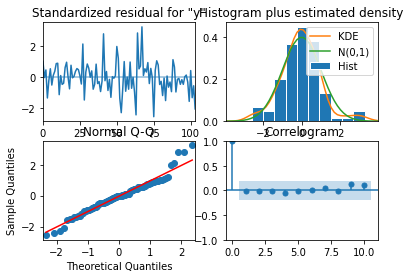

In [187]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [188]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [189]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.372918  388.345143     566.230423    2088.515412
1  1315.103258  402.008803     527.180483    2103.026033
2  1621.577698  402.002408     833.667456    2409.487940
3  1598.858811  407.240420     800.682255    2397.035367
4  1392.677638  407.970567     593.070020    2192.285256

In [190]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
mape_model22_test=MAPE(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean)

print(rmse)
print(mape_model22_test)

528.6313948594088
18.89


In [191]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape_model22_test]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf_1 = pd.concat([resultsDf_1,temp_resultsDf])

resultsDf_1

Test RMSE  Test MAPE
Auto ARIMA(2,1,2)        1299.980250      43.20
Manual ARIMA(2,1,1)      1300.721383      39.86
SARIMA(1,1,2)(2,0,2,6)    627.053497      39.86
SARIMA(0,1,2)(2,0,2,12)   528.631395      18.89

## Building the most optimum model on the Full Data.

In [192]:
full_data_model = 
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

SyntaxError: invalid syntax (2425743357.py, line 1)

## Evaluate the model on the whole and predict 12 months into the future 

In [194]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

NameError: name 'results_full_data_model' is not defined

In [195]:
fullmodel2 = ExponentialSmoothing(df_2['Sparkling'],
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_4855/232148537.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fullmodel2 = ExponentialSmoothing(df_2['Sparkling'],


In [196]:
RMSE_fullmodel2 = metrics.mean_squared_error(df_2['Sparkling'],fullmodel2.fittedvalues,squared=False)
MAPE_fullmodel2 = MAPE(df_2['Sparkling'],fullmodel2.fittedvalues)

print('RMSE:',RMSE_fullmodel2,'\nMAPE:',MAPE_fullmodel2)

RMSE: 456.4986433088807 
MAPE: 14.32


In [197]:
prediction_1 = fullmodel2.forecast(steps=12)

In [198]:
df_2.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

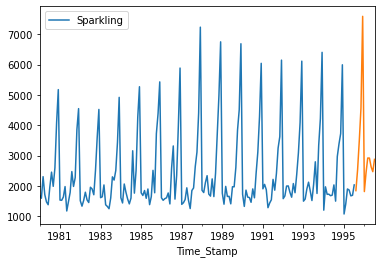

In [199]:
df_2.plot()
prediction_1.plot();

In [200]:
np.percentile(prediction_1,[2.5,97.5])

array([1819.44050758, 6765.51547897])

In [201]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

lower_CI   prediction      upper_ci
1995-08-31    23.160930  1842.601438   8608.116917
1995-09-30   712.529152  2531.969660   9297.485139
1995-10-31  1665.826865  3485.267372  10250.782851
1995-11-30  2748.436769  4567.877277  11333.392756
1995-12-31  5779.661876  7599.102383  14364.617862

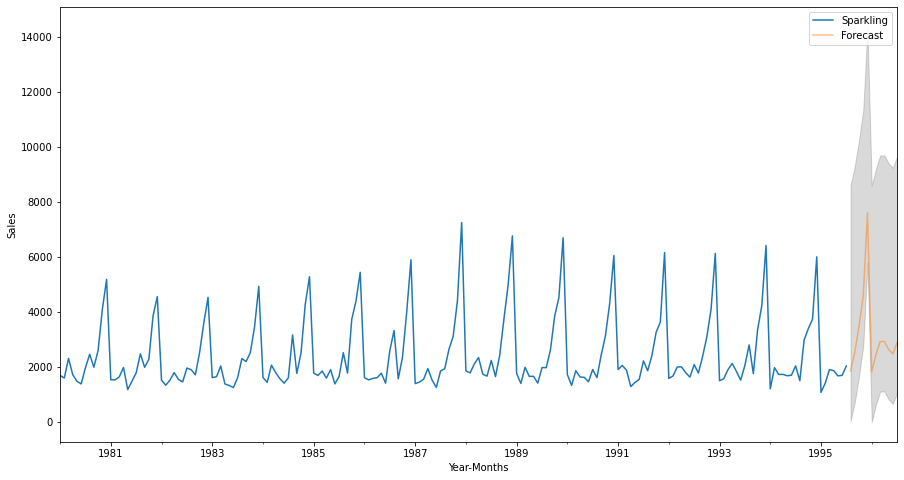

In [202]:
axis = df_2.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [221]:
prediction_1.head(12)

1995-08-31    1842.601438
1995-09-30    2531.969660
1995-10-31    3485.267372
1995-11-30    4567.877277
1995-12-31    7599.102383
1996-01-31    1810.655327
1996-02-29    2437.651257
1996-03-31    2919.070182
1996-04-30    2917.909157
1996-05-31    2629.270862
1996-06-30    2468.748961
1996-07-31    2874.793273
Freq: M, dtype: float64

In [222]:
df_2.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031